## Project Title: 

### Predicting Tax Assessed Property Value (Philadelphia Region)

## Creator: 

### Daniel Ramirez Jr.


## Abstract

The purpose of this model was to understand the fundamentals of multi-linear regression, and then apply the tool to make predictions on unseen data. This model contains a step-by-step breakdown of the code used as well as the assumptions used to justify the logic of the model. The topic of the model was predicting Tax Assessed Property Value (Philadelphia Region), which is the dollar value placed on a property, for tax recording purposes, by a government agency. This value was used because the government agency conducts professional appraisals and their price is relatively close to the price that the free-market deems fair. 

The idea is that real-estate investors can combine their fundamental ideologies with the information provided in the statistical model to make more informed decisions regarding investing strategies. To provide a base-line framework for real-estate investors, this analysis used a dataset that contained variables pertaining to properties in the Philadelphia, Pennsylvania region. The data was cleansed and described using various different visualization methods such as bar charts, boxplots, and pie charts, etc. Afterwards, the data was inputted into a multi-linear regression model that was 31% accurate in predicting the Tax Assessed Property Value of a given property in the Philadelphia Region. 

The findings of the model stated that the following variables were statistically signficiant in predicting Tax Assessed Property Value: 

<ins> Significant Variables: <ins> 


    
- Whether the property is located in the following Postal Area Codes of Philadelphia:

    - 19120
    - 19134
    - 19140
    - 19143

<ins> Statistical Interpretation:<ins> 

   - For every one unit increase in the Zillow Estimate variable, the predicted Tax Assessed Property Value is set to increase by 34.89%
   - For every one unit increase in the 19120 variable, the predicted Tax Assessed Property Valueis set to increase by 13.10% 
   - For every one unit increase in the 19134 variable, the predicted Tax Assessed Property Value is set to decrease by 34.02%
   - For every one unit increase in the 19140 variable, the predicted Tax Assessed Property Value is set to decrease by 20.01% 
   - For every one unit increase in the 19143 variable, the predicted Tax Assessed Property Value is set to decrease by 25.37%
    
    
The recommendations of this model is that investor should try to understand what differentiates the 19144 area code from area codes: 19134, 19140, 19143? The model predicted a lower value whenever a property was located in the those area codes. Similarly, the investor should understand what drives economic value in 19120 postal area code that could explain the price difference.

## 1. Problem Introduction

For several generations in finance, Fundamental Analysis has been the prime method of assessing risks and making investment decisions. Fundamental analysis is a method of evaluating an asset and determining the intrinsic value by looking at the business, the industry, the entirety of current market events, and the domestic and global environment. After this, buying and selling decisions are made based on whether a property is trading at a discount or a premium to its fair value. A property’s value can be perceived as an opinion by many people, but the ability to defend the value is what makes the investment stronger.

However, as the digital-age matures, more financial institutions are leveraging the use of structured/unstructured data to make decisions on what properties should be bought or sold. This form of investing can be described as Technical Analysis, of which does not consider the underlying asset nor the economics that impact the value of a property, but rather is driven by charts, price fluctuations, and trend finding to predict optimal purchasing/selling opportunities.

## 2. Dataset

This section pertains to components of the dataset used.

### 2.1. Dataset Source


To achieve the objective, a 216Kb dataset from 2017 was used and taken from the following link on Kaggle.com:
https://www.kaggle.com/harry007/philly-real-estate-data-set-sample?select=Properties_philly_Kraggle_v2.csv

It is easily accessible and free for anybody to use, as long as one creates an account with Kaggle.

### 2.2. Dataset Description 

The dataset used included a 216Kb excel file that contains 30 columns and 615 rows, where each row pertains to a unique property in the region of Philadelphia, Pennsylvania. The columns consists of discrete, continous, and categorical data that decscribes unique characteristics of a certain property. From a preliminary perspective, it was believed that variables such as the amount of bedrooms, bathrooms, and property age, could impact the tax assessed value of a real-estate property.

### 2.3. Variable Selection

The initial set of variables that were chosen to explain the variation in the tax assessment value of a real-estate property in the the Philadelphia Region were as follows:

- Postal Code (Identifier that pertains to the general location of a property. Philadelphia has several zipcodes)
- Property Type (Single Family/Townhouse/Condominium/Multi-Family)
- Finished Square Feet (Property Size)
- Amount of Bathrooms the propert has
- Amount of Bedrooms the property has
- Year Built (Will be used to determine age of the house)
- Sale Date of the property (Will be used to determine age of the house)
- Violent Crime Rate
- School Score
- Avg Walk & Transit score
- Sheriff Cost (Essentially the forclosure price)
- Opening Bid (First Offer)
- Zillow Estimate (Property Estimate from real-estate Company Zillow)

### 2.4. Acquiring and Loading Data

In [10]:
#import the csv file from the folder in which it is located on ones computer
import pandas as pd
path = "C:/Users/Papi/Documents/INFO 212/Final Project/Philly_Properties.csv"
properties_df = pd.read_csv(path)
print()
print('The Dataframe has %i rows and %i columns.'%(properties_df.shape[0],properties_df.shape[1]))
print()
properties_df.head()



The Dataframe has 805 rows and 30 columns.



,Address,Zillow Address,Sale Date,Opening Bid,Sale Price/bid price,Book/Writ,OPA,Postal Code,Attorney,Ward,...,School Score,Zillow Estimate,Rent Estimate,taxAssessment,yearBuilt,finished \n(SqFt),bathrooms,bedrooms,PropType,Average comps
0,2327 E SERGEANT ST,"2327 E SERGEANT ST , Philadelphia, PA 19125",September 13 2016,11400.0,"$11,400",1609-412,314095100.0,19125.0,PHELAN HALLINAN LLP,31.0,...,15.87,"228,663.00","1,500.00","174,000.00",1921.0,898.0,1,2,SingleFamily,"240,254.55"
1,4466 TOLBUT ST,"4466 TOLBUT ST , Philadelphia, PA 19136",August 2 2016,8500.0,"$8,500",1606-339,652092800.0,19136.0,PARKER MCCAY,65.0,...,32.53,"141,579.00","1,200.00","119,700.00",1959.0,1120.0,1.5,3,Townhouse,"150,937.50"
2,134 E WALNUT LN,"134 E WALNUT LN , Philadelphia, PA 19144",August 2 2016,12600.0,"$12,600",1605-426,592058735.0,19144.0,PHELAN HALLINAN LLP,59.0,...,7.89,"186,172.00","1,500.00","190,300.00",2006.0,1882.0,3,3,SingleFamily,"225,483.33"
3,111 W ABBOTTSFORD AVE,"111 W ABBOTTSFORD AVE , Philadelphia, PA 19144",August 2 2016,9200.0,"$9,200",1607-317,123016300.0,19144.0,KML LAW GROUP,12.0,...,7.89,"168,557.00","1,400.00","118,300.00",1900.0,1792.0,1,4,SingleFamily,"135,755.56"
4,146 E DUVAL ST,"146 E DUVAL ST , Philadelphia, PA 19144",August 2 2016,8900.0,"$8,900",1605-510,592159100.0,19144.0,PHELAN HALLINAN LLP,59.0,...,7.89,"135,045.00","1,350.00","113,700.00",1925.0,1419.0,2,3,SingleFamily,"144,120.00"


## 3. Pre-Cleansing Data for Exploration
---

### 3.1. Renaming Variables and Removing Intances

The data was cleansed and removed of any non-essential columns/instances that do not add value to the analysis. For example, while the address of a property is important, it is not important to the model given that it is a unique string. What was used instead of a string was the "Postal Code" column that contains the categorical region of where the property is located.

In [11]:
#run once because the code is renaming variables in the dataframe

#filter the dataframe so that it only includes the relevant variables mentioned in section 1.1
properties_df = properties_df[['Postal Code','finished \n(SqFt)','PropType',' bathrooms ',' bedrooms ','yearBuilt','Sale Date',' Violent Crime Rate ',
                              ' School Score  ', ' Avg Walk&Transit score  ','Sheriff Cost','Opening Bid','Zillow Estimate','taxAssessment']]


#change the variable names so that they are easier to reference
properties_df = properties_df.rename(columns={"finished \n(SqFt)": "Size_SqFt", " bathrooms ": "bathrooms"," bedrooms ": "bedrooms"," Violent Crime Rate ": "Crime_Rate_V", " Avg Walk&Transit score  ": "Walk_Transit_Score"," School Score  ": "School_Score"})



In [12]:
print()
print('The Dataframe has %i rows and %i columns.'%(properties_df.shape[0],properties_df.shape[1]))
print()
properties_df.head()



The Dataframe has 805 rows and 14 columns.



,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,taxAssessment
0,19125.0,898.0,SingleFamily,1,2,1921.0,September 13 2016,1.13,15.87,82.25,1314.10,11400.0,"228,663.00","174,000.00"
1,19136.0,1120.0,Townhouse,1.5,3,1959.0,August 2 2016,0.35,32.53,65.25,1254.05,8500.0,"141,579.00","119,700.00"
2,19144.0,1882.0,SingleFamily,3,3,2006.0,August 2 2016,0.86,7.89,71.75,1337.33,12600.0,"186,172.00","190,300.00"
3,19144.0,1792.0,SingleFamily,1,4,1900.0,August 2 2016,0.86,7.89,71.75,1459.76,9200.0,"168,557.00","118,300.00"
4,19144.0,1419.0,SingleFamily,2,3,1925.0,August 2 2016,0.86,7.89,71.75,1263.36,8900.0,"135,045.00","113,700.00"


In [13]:
#keep the rows that have NA amounts that are less than or equal to 2
properties_df = properties_df[properties_df.isnull().sum(axis=1) <= 2]

print()
print('The Dataframe has %i rows and %i columns.'%(properties_df.shape[0],properties_df.shape[1]))
print()

properties_df.head()



The Dataframe has 615 rows and 14 columns.



,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,taxAssessment
0,19125.0,898.0,SingleFamily,1,2,1921.0,September 13 2016,1.13,15.87,82.25,1314.10,11400.0,"228,663.00","174,000.00"
1,19136.0,1120.0,Townhouse,1.5,3,1959.0,August 2 2016,0.35,32.53,65.25,1254.05,8500.0,"141,579.00","119,700.00"
2,19144.0,1882.0,SingleFamily,3,3,2006.0,August 2 2016,0.86,7.89,71.75,1337.33,12600.0,"186,172.00","190,300.00"
3,19144.0,1792.0,SingleFamily,1,4,1900.0,August 2 2016,0.86,7.89,71.75,1459.76,9200.0,"168,557.00","118,300.00"
4,19144.0,1419.0,SingleFamily,2,3,1925.0,August 2 2016,0.86,7.89,71.75,1263.36,8900.0,"135,045.00","113,700.00"


### 3.2.  Altering Variable Data Types & Filtering Out Instances
This analysis included relevant postal codes, of which the model assumed were the postal codes that appeared at least 20 times in the dataset. 

In [14]:
#Identify the datatypes of the variables being used in the analysis

print('Data Types:\n')
for c in properties_df:
    print(c,':',properties_df[c].dtype)


Data Types:

Postal Code : float64
Size_SqFt : float64
PropType : object
bathrooms : object
bedrooms : object
yearBuilt : float64
Sale Date : object
Crime_Rate_V : float64
School_Score : float64
Walk_Transit_Score : float64
Sheriff Cost : float64
Opening Bid : float64
Zillow Estimate : object
taxAssessment : object


In [15]:
#convert the estimate values into strings so that the comma can be removed and coverted into a float    
properties_df['taxAssessment'] = properties_df['taxAssessment'].astype('str')
properties_df['Zillow Estimate'] = properties_df['Zillow Estimate'].astype('str')

properties_df['taxAssessment'] = properties_df['taxAssessment'].str.replace(',', '').astype(float)
properties_df['Zillow Estimate'] = properties_df['Zillow Estimate'].str.replace(',', '').astype(float)


#convert bedrooms and bathrooms into integers and floats, respectively
#first convert from object to string then to integers and floats

remove_null = ' -   '
properties_df['bedrooms'] = properties_df['bedrooms'].astype(str)
properties_df['bedrooms'] = properties_df['bedrooms'].str.replace(remove_null, '0').astype(int)


properties_df['bathrooms'] = properties_df['bathrooms'].astype(str)
properties_df['bathrooms'] = properties_df['bathrooms'].str.replace(remove_null, '0').astype(float)



#convert the postal code variable into an object
properties_df['Postal Code'] = properties_df['Postal Code'].astype(int)


#assign the V-values to a list variable to reference later for descriptive and predicitve analytics
y_variable = properties_df['taxAssessment'].tolist()


properties_df.head()

,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,taxAssessment
0,19125,898.0,SingleFamily,1.0,2,1921.0,September 13 2016,1.13,15.87,82.25,1314.10,11400.0,228663.0,174000.0
1,19136,1120.0,Townhouse,1.5,3,1959.0,August 2 2016,0.35,32.53,65.25,1254.05,8500.0,141579.0,119700.0
2,19144,1882.0,SingleFamily,3.0,3,2006.0,August 2 2016,0.86,7.89,71.75,1337.33,12600.0,186172.0,190300.0
3,19144,1792.0,SingleFamily,1.0,4,1900.0,August 2 2016,0.86,7.89,71.75,1459.76,9200.0,168557.0,118300.0
4,19144,1419.0,SingleFamily,2.0,3,1925.0,August 2 2016,0.86,7.89,71.75,1263.36,8900.0,135045.0,113700.0


In [16]:
#What postal codes appear the most in the dataset and then plot the relevant information for those selected 

#filtering data
postal_frequencies = properties_df.groupby(["Postal Code"]).size().reset_index(name='counts')
postal_frequencies = postal_frequencies.loc[postal_frequencies['counts'] >=20]
postal_frequencies

#get the data and put it into a list that will be referenced when matching the row values in the master dataset  
postal_codes_list = postal_frequencies['Postal Code'].tolist()
postal_codes_list.sort()

#exclude the rows that pertain to a postal code that is not in the list
properties_df = properties_df[properties_df['Postal Code'].isin(postal_codes_list)]

#assign the V-values to a list variable to reference later for descriptive and predicitve analytics
y_variable = properties_df['taxAssessment'].tolist()

properties_df.head()

,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,taxAssessment
2,19144,1882.0,SingleFamily,3.0,3,2006.0,August 2 2016,0.86,7.89,71.75,1337.33,12600.0,186172.0,190300.0
3,19144,1792.0,SingleFamily,1.0,4,1900.0,August 2 2016,0.86,7.89,71.75,1459.76,9200.0,168557.0,118300.0
4,19144,1419.0,SingleFamily,2.0,3,1925.0,August 2 2016,0.86,7.89,71.75,1263.36,8900.0,135045.0,113700.0
7,19131,1354.0,SingleFamily,1.0,3,1925.0,October 4 2016,0.29,8.34,65.75,1286.45,10000.0,155873.0,114800.0
9,19142,992.0,Condominium,1.0,3,1925.0,October 4 2016,0.84,7.28,76.50,1412.47,7100.0,96713.0,70500.0


In [17]:
properties_df.isna().sum()

Postal Code           0
Size_SqFt             0
PropType              0
bathrooms             0
bedrooms              0
yearBuilt             0
Sale Date             0
Crime_Rate_V          0
School_Score          0
Walk_Transit_Score    0
Sheriff Cost          0
Opening Bid           4
Zillow Estimate       0
taxAssessment         0
dtype: int64

Given that opening bid has 4 missing values, thus they will be filled with values that reflect the median of all the values in the dataset.


In [18]:
#given that opening bid has 4 missing values, thus they will be filled with values that reflect the median of all the values in the dataset
median_value=properties_df['Opening Bid'].median()
  
# mean of values in the same column
properties_df['Opening Bid'].fillna(value=median_value, inplace=True)



In [19]:
#check to see if there are still any missing values left
properties_df.isna().sum()

Postal Code           0
Size_SqFt             0
PropType              0
bathrooms             0
bedrooms              0
yearBuilt             0
Sale Date             0
Crime_Rate_V          0
School_Score          0
Walk_Transit_Score    0
Sheriff Cost          0
Opening Bid           0
Zillow Estimate       0
taxAssessment         0
dtype: int64

## 4. Exploring and Visualizing Data

Before any statistical analysis was completed, it was necessary to explore the dataset in hopes of finding any connections between the properties and variables. 

### 4.1. Property Type & Tax Assessed Value

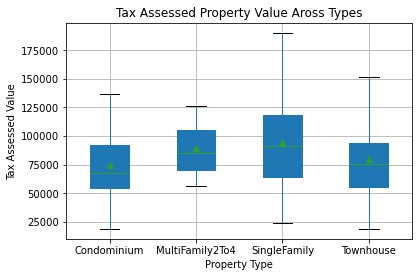

In [20]:
import matplotlib.pyplot as plt
import numpy as np

#whisker plots allow us to see the distribution among the tax assessed properties

property_value_dist = properties_df.boxplot(by ='PropType', column =['taxAssessment'], patch_artist=True, grid = True,showfliers=False,showmeans=True);
property_value_dist.set_title('Tax Assessed Property Value Aross Types');
plt.suptitle("")
property_value_dist.set_xlabel('Property Type');
property_value_dist.set_ylabel('Tax Assessed Value');
plt.rcParams["figure.figsize"] = [10, 6]



It is important to understand the relationship between a property's value and its structure before making an investment because the property types should be looked at as different business segments with their own qualities. From the dataset, it was clear that Single-Family properties had the highest Tax Assessed Median Value, followed closly by Multi-Family properties. However, it should be noted that the range of Multi-Family property values was signficantly shorter than that of Singe Family homes. The takeaway is that the Multi-Family property values in the dataset could potentially signal that they are a signficantly less risky of an investment than Single-Family homes relative to the median value. The word 'potentially' was used because the data  must be furthered explored to see where these property types are located. What if most of the Multi-Family properties were located in a certain area code and Single-Family properties spanned over several area codes? That would make the action of comparing Tax Assessed Value among Property Types invalid.

### 4.2. Property Type Across Postal Areas

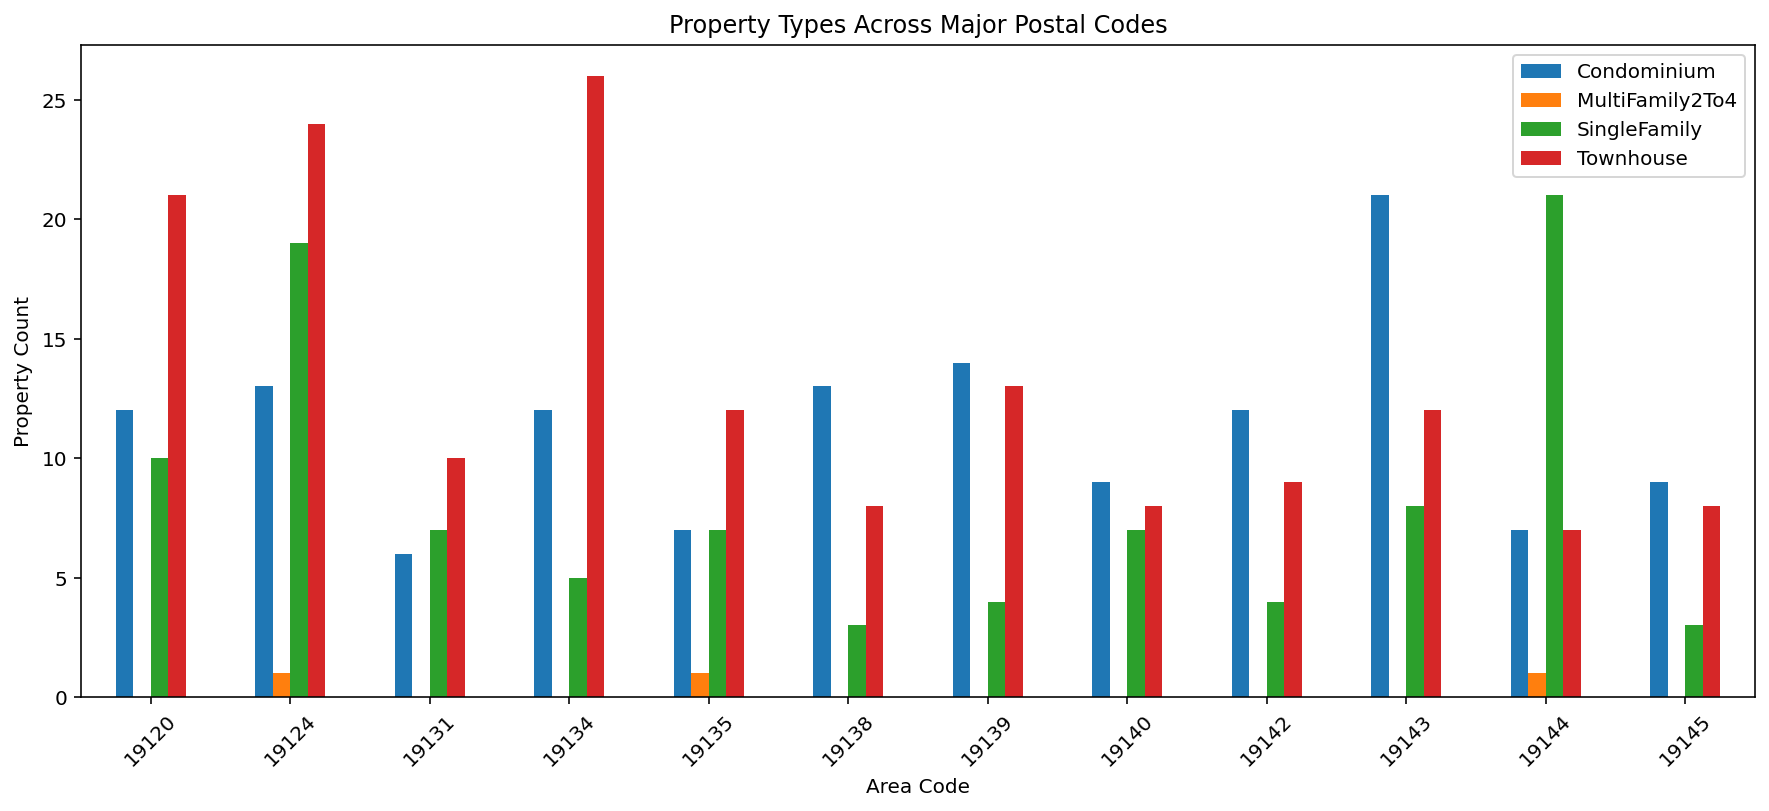

In [21]:
#Postal Code and its corresponding Property Type
#unstack is a tool to convert the groupby results into a dataframe
area_prop_types = properties_df.groupby(["Postal Code","PropType"]).size().unstack()

#Fill the values
area_prop_types = area_prop_types.fillna(0)

condominium = area_prop_types['Condominium'].tolist()
multi_family = area_prop_types['MultiFamily2To4'].tolist()
Single_family = area_prop_types['SingleFamily'].tolist()
Townhouse = area_prop_types['Townhouse'].tolist()

#convert into integer to remove float
postal_list_string = [int(x) for x in postal_codes_list]

#create the dataframe

area_dict = {'Condominium': condominium, 'MultiFamily2To4': multi_family, 'SingleFamily': Single_family,'Townhouse':Townhouse} 
    
postal_df = pd.DataFrame(area_dict)

plt.rcParams["figure.figsize"] = [15, 6]

# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

#plot the graph
postal_df.plot(kind='bar')


plt.title('Property Types Across Major Postal Codes');
plt.xlabel('Area Code');
plt.ylabel('Property Count');

ticks = range(0,len(postal_list_string))
plt.xticks(ticks, postal_list_string);
plt.xticks(rotation=45);



From the bargraph above, it was clear that Property Types spread across all postal codes in the dataset, which validates the statements made previously in the box-plot section about Multi-Family and Single-Family properties. It is important to know where each property type is located because each postal area code has a different type of micro-economy that could impact the value of its properties. Thus, one would have to conduct research in each postal code area to understand what the economic factors are and to gage what the culuture is like to better understand potential buyers.

Another important to note; the only postal codes with Multi-Family properties were: 19124 ,19135 ,19144. Perhaps, there is some type of law restrictions in these postal codes that make it difficult to build and manage those type of properties. Finally, the most common property type, across all postal codes, was the Townhouse, and the postal code 19134 contained the most amount of them with over 25 instances.



### 4.3. Correlations Among Tax Assessed Value


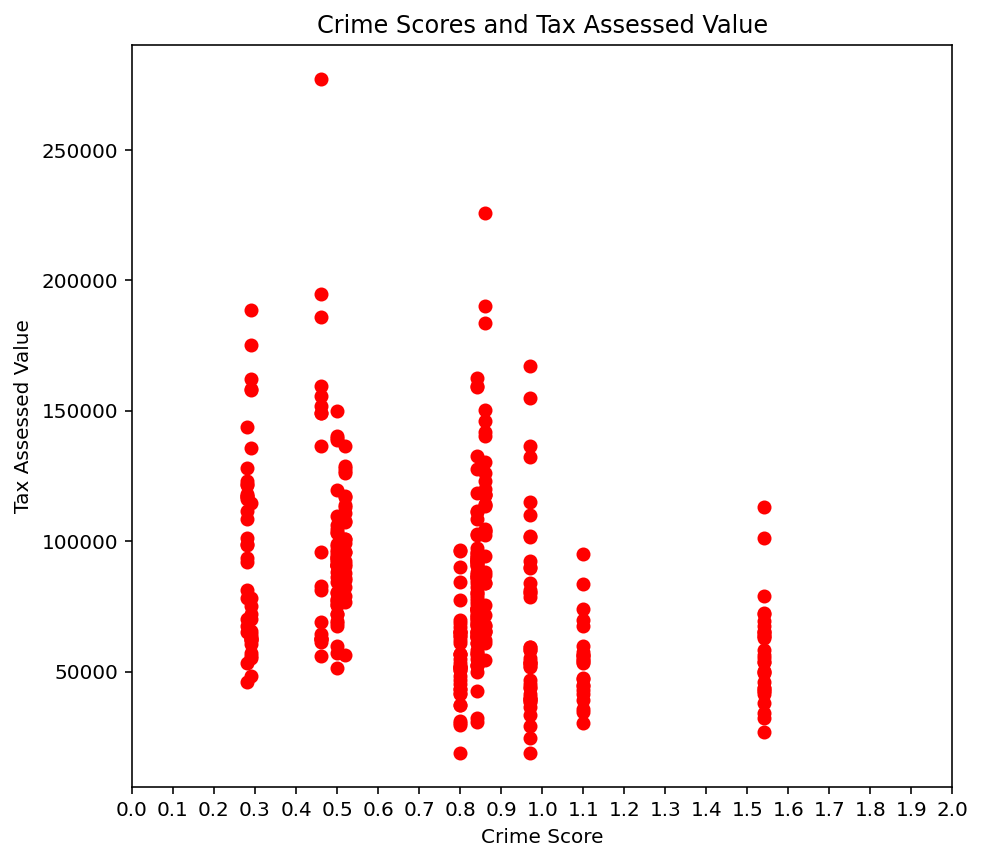

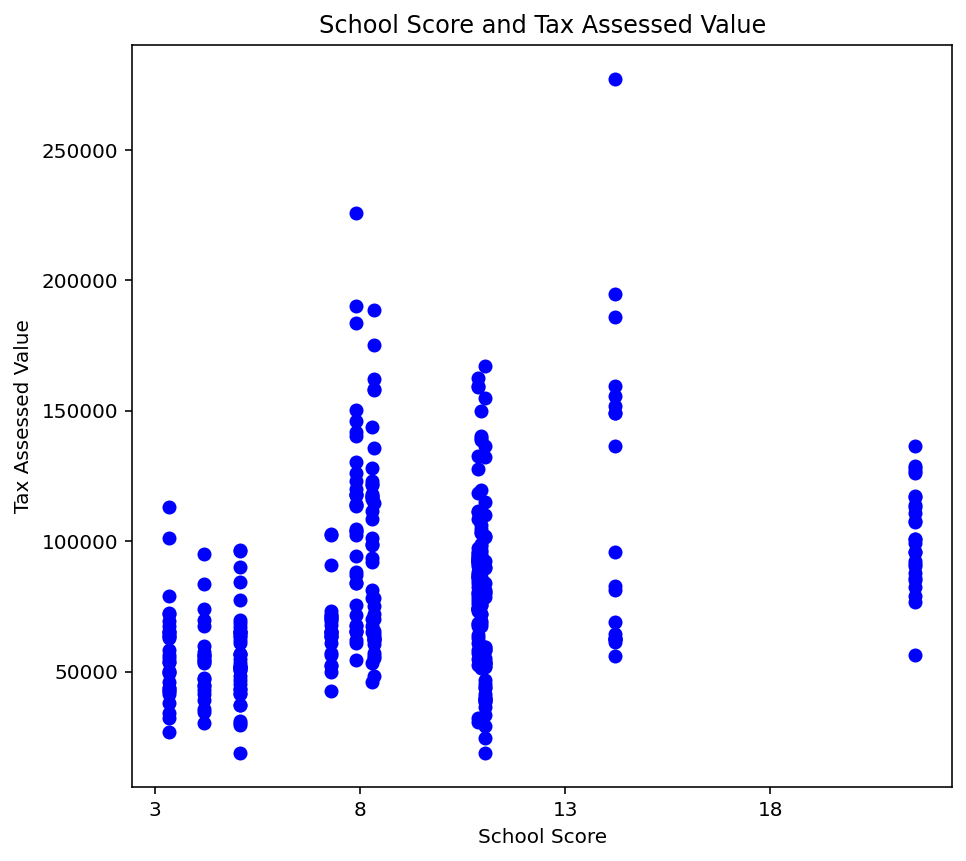

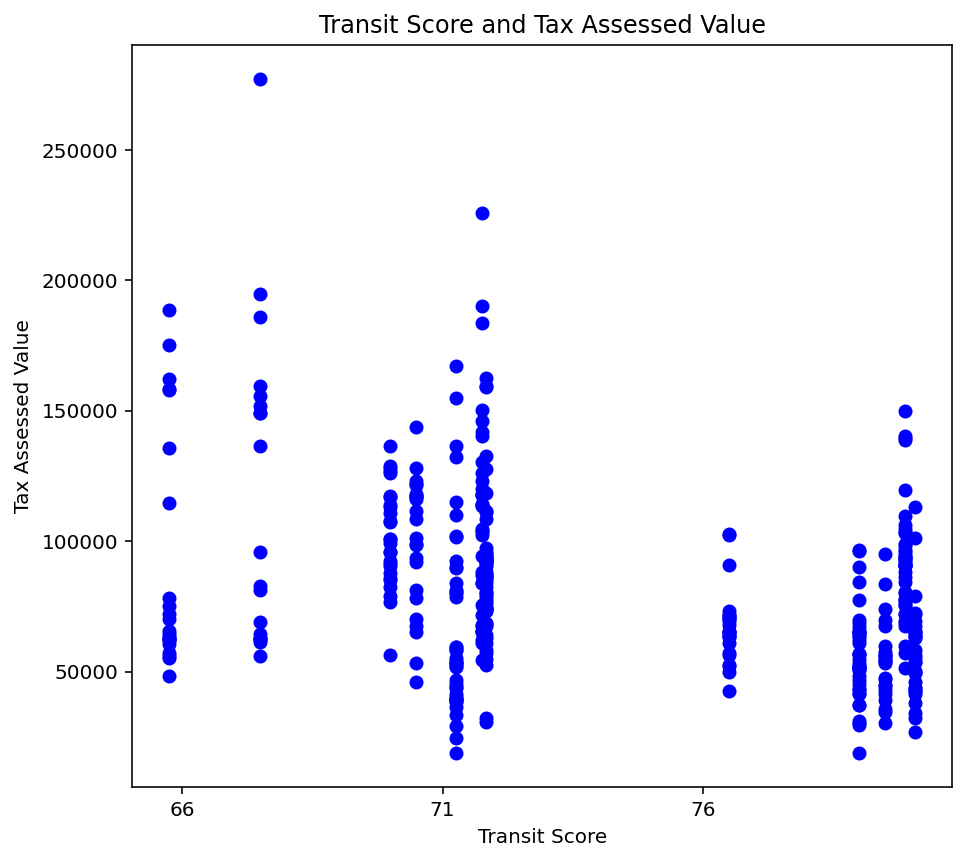

In [22]:
#create list of the numeric data so that correlation can be calculated in respect to tax assessed value
crime_rate_list = properties_df['Crime_Rate_V'].tolist()
school_score_list = properties_df['School_Score'].tolist()
transportation_score_list = properties_df['Walk_Transit_Score'].tolist()

#plot the correlation graphs

#plot1 code
fig = plt.figure(figsize=(25,15))

plt.subplot(2,3,1) 
plt.scatter(crime_rate_list, y_variable, c ="red");
plot1_ticks = [a for a in np.arange(0.0,2.1,0.1)]
plt.xticks(plot1_ticks);

plt.title('Crime Scores and Tax Assessed Value');
plt.xlabel('Crime Score');
plt.ylabel('Tax Assessed Value');


#plot2 code
fig = plt.figure(figsize=(25,15))

plt.subplot(2,3,2) 
plt.scatter(school_score_list, y_variable, c ="blue");
plot2_ticks = [a for a in np.arange(round(min(school_score_list),0),max(school_score_list),5)]
plt.xticks(plot2_ticks);

plt.title('School Score and Tax Assessed Value');
plt.xlabel('School Score');
plt.ylabel('Tax Assessed Value');


#plot3 code
fig = plt.figure(figsize=(25,15))

plt.subplot(2,3,3) 
plt.scatter(transportation_score_list, y_variable, c ="blue");
plot3_ticks = [a for a in np.arange(round(min(transportation_score_list),0),max(transportation_score_list),5)]
plt.xticks(plot3_ticks);

plt.title('Transit Score and Tax Assessed Value');
plt.xlabel('Transit Score');
plt.ylabel('Tax Assessed Value');



In [570]:
#calculate correlation and display
import scipy.stats

print()
print('Correlations Between Tax Assessed Property Values and Relevant Measures:')
print('------------------------------------------------------------------------\n')

#correlation between crime score and y variable
correlation1 = scipy.stats.spearmanr(crime_rate_list, y_variable)[0]

print('Correlation between Crime and Tax Assessed Property value is %f'%(round(correlation1,2)))
print()

correlation2 = scipy.stats.spearmanr(school_score_list, y_variable)[0]
print('Correlation between School Scores and Tax Assessed Property value is %f'%(round(correlation2,2)))
print()


correlation3 = scipy.stats.spearmanr(transportation_score_list, y_variable)[0]
print('Correlation between Transit Scores and Tax Assessed Property value is %f'%(round(correlation3,2)))
print()


Correlations Between Tax Assessed Property Values and Relevant Measures:
------------------------------------------------------------------------

Correlation between Crime and Tax Assessed Property value is -0.350000

Correlation between School Scores and Tax Assessed Property value is 0.370000

Correlation between Transit Scores and Tax Assessed Property value is -0.300000



There seems to be a correlation of -0.35, which means that there is a moderate, negative relationship between Crime Scores and Tax Assessed Property Values. As Crime Scores increase, Tax Assessed Property Values tend to fall. Perhaps, people are willing to pay less to live in a non-safe area. 

Moreover, there is a correlation of 0.37 which means that there is a moderate, positive relationship between School Scores and Tax Assessed Property Values. As School Scores increase, Tax Assessed Property Values tend to Rise. Perhaps, people are willing to pay more to live in an area where the education system is better.

Finally,  correlation of -0.30 which means that there is a moderate, negative relationship between Transit Scores and Tax Assessed Property Values. As Transit Scores increase, Tax Assessed Property Values tend to fall. Perhaps, a location that is central could mean a busy, noisy area and people may want to pay less for that. 


### 4.4. School and Crime Scores Across Postal Areas


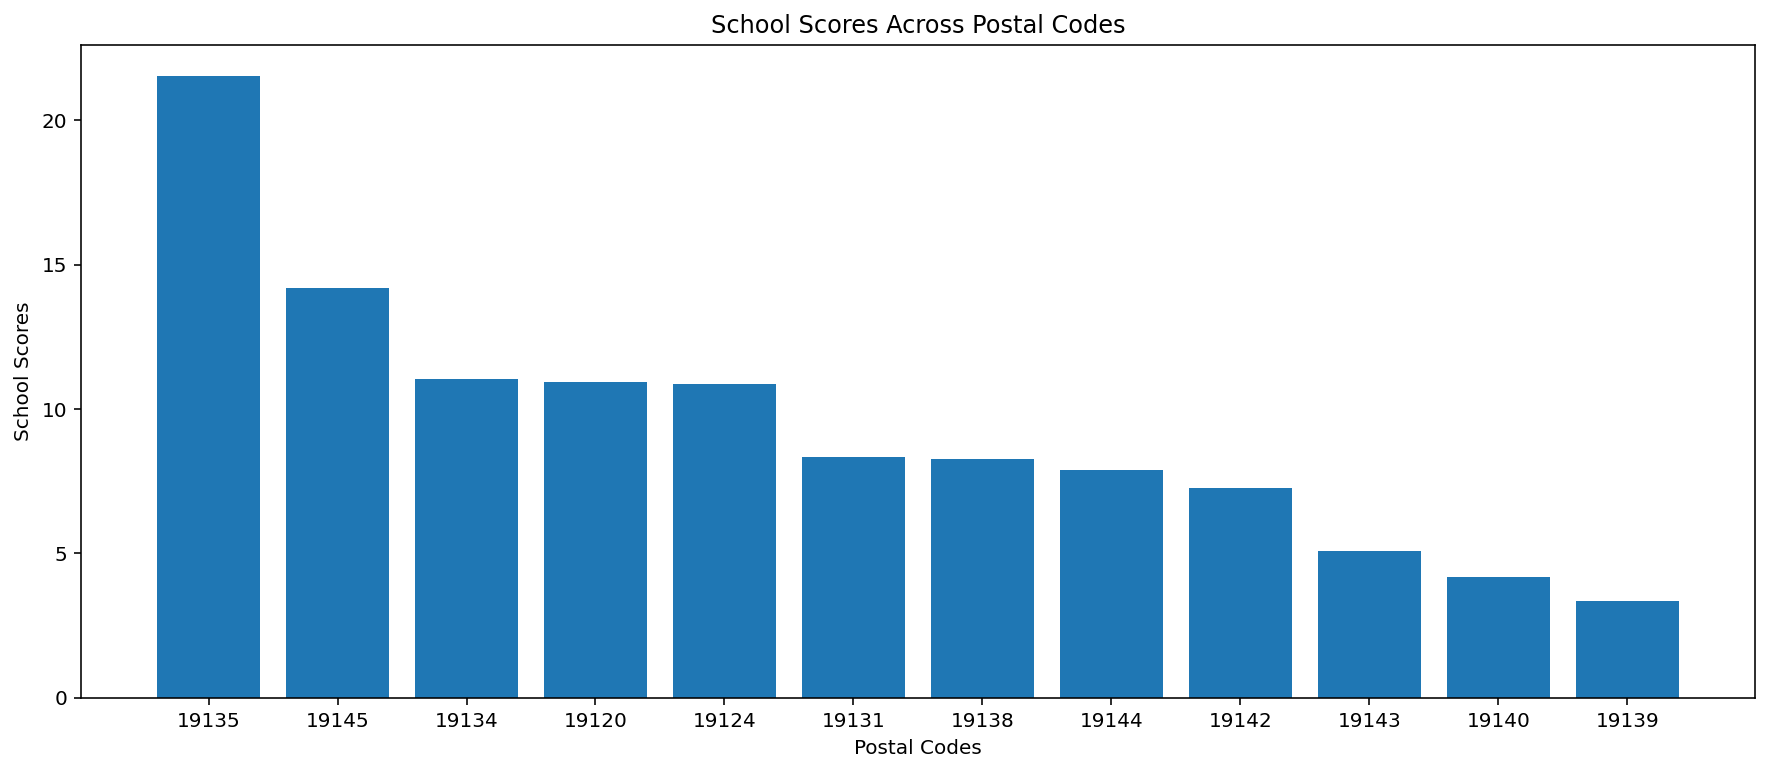

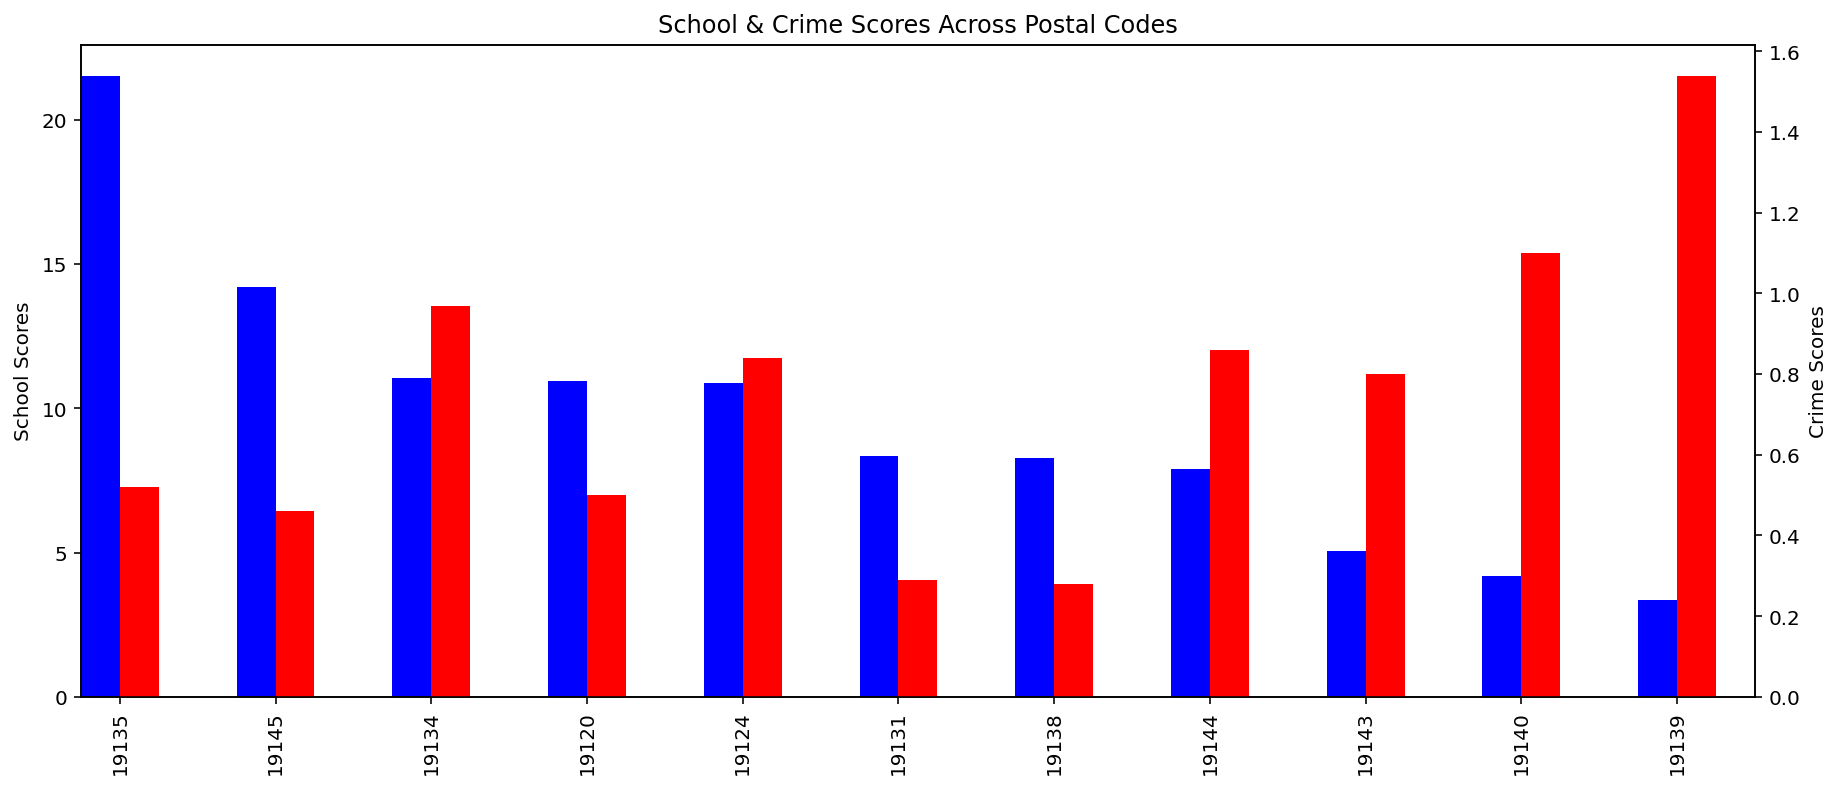

In [23]:
#Show relationship between education score and postal code using a bar graph
#create a new dataframe with the data needed

#create a new dataframe that contains the school score for each postal code and remove any duplicates
test = properties_df.sort_values('School_Score', ascending=False)
test = test.drop_duplicates(subset='School_Score', keep='first')
test = test[['Postal Code','School_Score']]

%config InlineBackend.figure_format = 'retina'

postal_labels = test['Postal Code'].tolist()
pl = [str(x) for x in postal_labels]

score_values = test['School_Score'].tolist()

plt.bar(pl, score_values)
plt.title('School Scores Across Postal Codes')
plt.xlabel('Postal Codes')
plt.ylabel('School Scores')
plt.show()


test1 = properties_df.sort_values('Crime_Rate_V', ascending=False)
test1 = test1.drop_duplicates(subset='Crime_Rate_V', keep='first')
test1 = test1[['Postal Code','Crime_Rate_V']]

merged_df = pd.merge(test, test1)


#second bar graph
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.25

merged_df.School_Score.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
merged_df.Crime_Rate_V.plot(kind='bar', color='red', ax=ax2, width=width, position=0)


ax.set_ylabel('School Scores')
ax2.set_ylabel('Crime Scores')

plt.title('School & Crime Scores Across Postal Codes')
plt.xlabel('Postal Codes')

labels_postal = merged_df['Postal Code'].tolist()
ticks9 = range(0,len(labels_postal))
plt.xticks(ticks9, labels_postal);
plt.show()

Understanding what locations have the highest school scores are important for investors given that property values tend to rise when the education system is better. The reason being is because of how the education system is funded in the United States. Every public school receives funds from local property taxes, thus the higher the property value, the higher the property tax. When schools receive more funds, they are more likely to have better resources such as teachers, learning materials, and technology, all of which positively impact the quality of education. 

Moreover, from the graphs above, it is evident that School Scores and Crime Scores are inversely related. Locations with high School Scores tended to have low Crime Scores and visa-versa. Logically, this would make sense because areas known for crime have poorly funded educational systems.

### 4.5. Tax Assessed Property Value Across Postal Areas


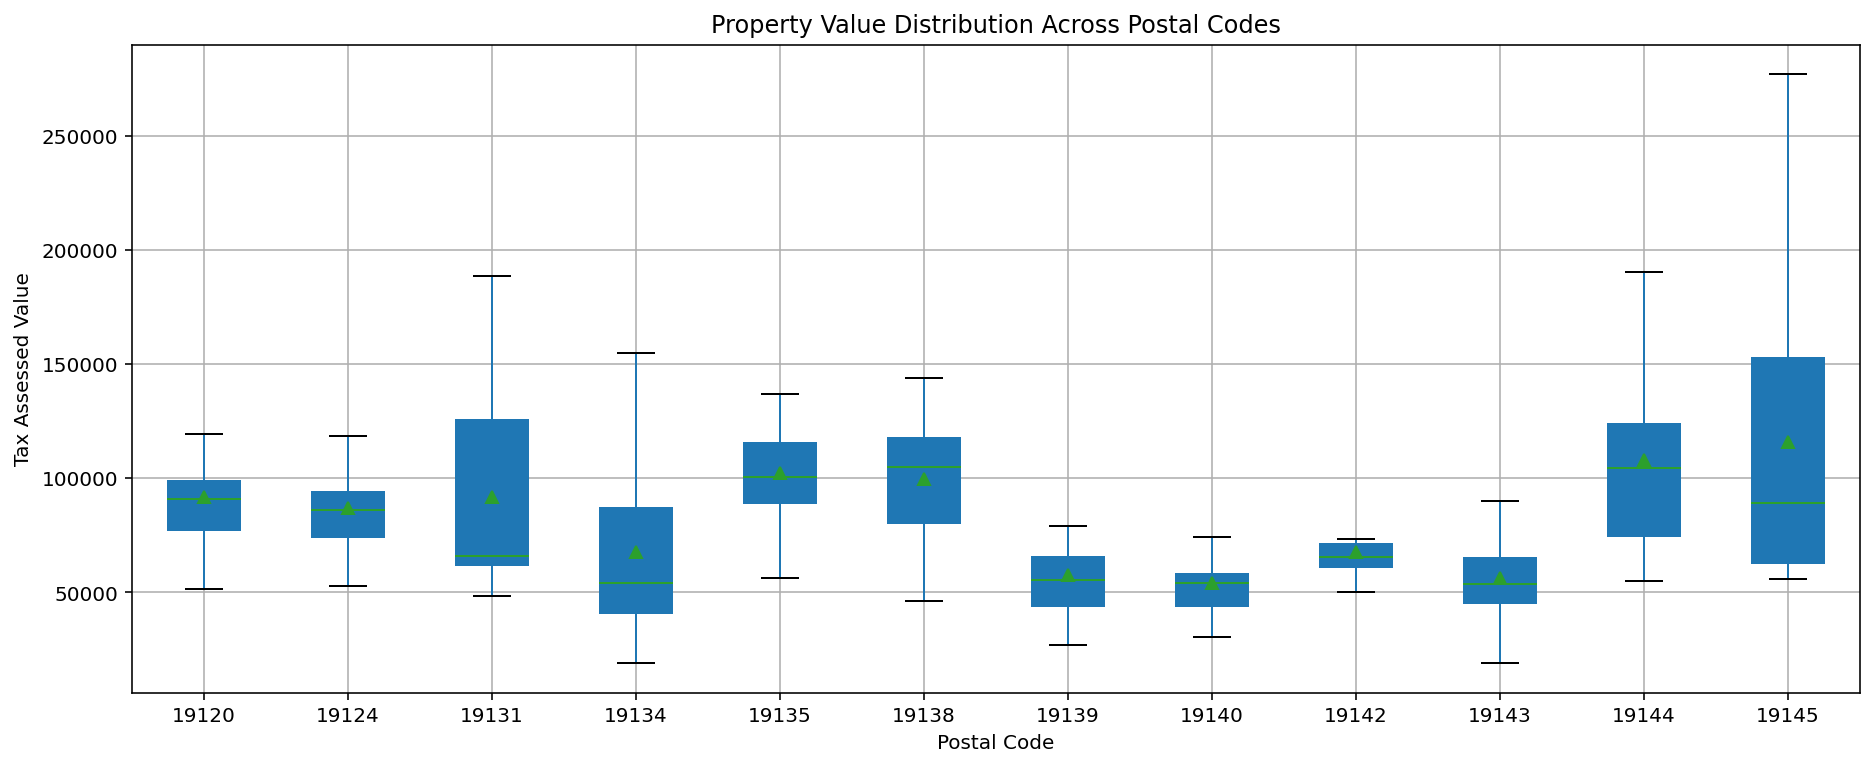

In [24]:
#whisker plots allow us to see the distribution among the tax assessed properties in each area code

property_value_dist = properties_df.boxplot(by ='Postal Code', column =['taxAssessment'], patch_artist=True, grid = True,showfliers=False,showmeans=True);
property_value_dist.set_title('Property Value Distribution Across Postal Codes');
plt.suptitle("")
property_value_dist.set_xlabel('Postal Code');
property_value_dist.set_ylabel('Tax Assessed Value');
plt.rcParams["figure.figsize"] = [10, 6]

%config InlineBackend.figure_format = 'retina'


The postal codes with the one of the highest tax assessed median values were 19135 and 19144, at slightly over $100,000. What could possibily explain this is that postal code 19144 contains the most Single Family and Multi-Family properties, of which happen to be the top two most expensives types. However, what is interesting is that 19144 had a relatively high Crime Rate Score and an average tax assessed value higher than its median. If Crime Scores are 'larger' than School Scores, but the average tax assessed property value is greater than the median, that could signal signs of gentrification because the value of some properties increase the average. For context, gentrification occurs when poor urban areas are changed by the fact that wealthier people are moving in, improving housing, and attracting new businesses, and more often, than not, displacing current inhabitants in the process. Finally, as for postal code 19135, this area had the highest School Score out of all the postal codes in the dataset and relatively 'low' Crime Scores.

## 5. Model Creation for Predictive Analysis

This linear regression model attempted to predict the Tax Assessed Value of a property given a set of relevant variables from the dataset; it also sought out to explain the statistical significance of those variables. The Tax Assessed Value of a property was used because it is a conservative measure, given that this value is usually lower than the market value. However, before applying any statistical tools, the input variables needed to be transformed and added in such a way that the model could interpret.

### 5.1. Variable Assignment & Creation

From the dataset, the "property age" variable was derived from the "yearBuilt" and "Sale Date" variables because the age of a property was intially believed to impact the Tax Assessed Value.


In [25]:
#split the dataframe into x and y variables
og_x_variables = properties_df.iloc[:,0:-1]
dependentVariable = properties_df.iloc[:,-1:]

#assign the Tax Assessed Values to the dependentVariable that will be referenced in the analysis 
dependentVariable

,taxAssessment
2,190300.0
3,118300.0
4,113700.0
7,114800.0
9,70500.0
...,...
607,32400.0
608,29400.0
611,43900.0
613,65700.0


In [26]:
#Create a variable for age of property. Given that every property in the dataset was sold in 2016, it can be easily changed 
og_x_variables['Sale Date'] = 2016
og_x_variables['Property_Age'] = og_x_variables['Sale Date'] - og_x_variables['yearBuilt']
og_x_variables.head() 


,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,Property_Age
2,19144,1882.0,SingleFamily,3.0,3,2006.0,2016,0.86,7.89,71.75,1337.33,12600.0,186172.0,10.0
3,19144,1792.0,SingleFamily,1.0,4,1900.0,2016,0.86,7.89,71.75,1459.76,9200.0,168557.0,116.0
4,19144,1419.0,SingleFamily,2.0,3,1925.0,2016,0.86,7.89,71.75,1263.36,8900.0,135045.0,91.0
7,19131,1354.0,SingleFamily,1.0,3,1925.0,2016,0.29,8.34,65.75,1286.45,10000.0,155873.0,91.0
9,19142,992.0,Condominium,1.0,3,1925.0,2016,0.84,7.28,76.50,1412.47,7100.0,96713.0,91.0


### 5.2. One-Hot Encoding & Dataframe Merging


From the dataset, the variables "PropType" and "Postal Code" are categorial and were hot-encoded. When performing linear regression with categorical variables, one must follow the "n -1" concept, where n represents the number of categories that a specific variable holds. For example, the variable "PropType" contains the following n (4) categories: SingleFamily, Condominium, Multi-Family, and Townhouse. 

To use this variable, it is necessary to establish the starting point. Thus, the model will assume that the property is a Single Family home and located in the 19144 Postal Code. This means that the model will have 4-1 = 3 'dummy' variables to represent the "PropType" variable. The 3 'dummy' variables are (Condominium, Multi-Family, and Townhouse), of which hold binary values, where 0 means that the property does not pertain to that particular property type. The same concept applies to the categories of the "Postal Code" variable but will have 11 'dummy' variables.

Once these 'dummy' variables are created, they need to be merged back into the dataframe that will used as inputs for the linear regression model.

In [27]:
prop_one_hot = pd.get_dummies(og_x_variables['PropType'])
prop_one_hot.pop('SingleFamily')


2      1
3      1
4      1
7      1
9      0
      ..
607    0
608    0
611    0
613    1
804    0
Name: SingleFamily, Length: 394, dtype: uint8

In [28]:
#one hot encoding for each categorical type for property type, excluding the single family homes
prop_one_hot.head()

,Condominium,MultiFamily2To4,Townhouse
2,0,0,0
3,0,0,0
4,0,0,0
7,0,0,0
9,1,0,0


In [29]:
postal_one_hot = pd.get_dummies(og_x_variables['Postal Code'])
postal_one_hot.pop(19144)


2      1
3      1
4      1
7      0
9      0
      ..
607    0
608    0
611    0
613    0
804    0
Name: 19144, Length: 394, dtype: uint8

In [30]:
#one hot encoding for each categorical type for postal code, excluding the 19144 postal code
postal_one_hot.shape

(394, 11)

In [31]:
#merge the dataframes to the properties_df dataframe
og_x_variables = og_x_variables.merge(prop_one_hot, left_index=True, right_index=True)
og_x_variables = og_x_variables.merge(postal_one_hot, left_index=True, right_index=True)
og_x_variables.head()
og_x_variables

,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,...,19124,19131,19134,19135,19138,19139,19140,19142,19143,19145
2,19144,1882.0,SingleFamily,3.0,3,2006.0,2016,0.86,7.89,71.75,...,0,0,0,0,0,0,0,0,0,0
3,19144,1792.0,SingleFamily,1.0,4,1900.0,2016,0.86,7.89,71.75,...,0,0,0,0,0,0,0,0,0,0
4,19144,1419.0,SingleFamily,2.0,3,1925.0,2016,0.86,7.89,71.75,...,0,0,0,0,0,0,0,0,0,0
7,19131,1354.0,SingleFamily,1.0,3,1925.0,2016,0.29,8.34,65.75,...,0,1,0,0,0,0,0,0,0,0
9,19142,992.0,Condominium,1.0,3,1925.0,2016,0.84,7.28,76.50,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,19139,1209.0,Condominium,1.0,3,1920.0,2016,1.54,3.34,80.08,...,0,0,0,0,0,1,0,0,0,0
608,19134,984.0,Townhouse,1.0,3,1910.0,2016,0.97,11.05,71.25,...,0,0,1,0,0,0,0,0,0,0
611,19139,1238.0,Townhouse,1.0,3,1925.0,2016,1.54,3.34,80.08,...,0,0,0,0,0,1,0,0,0,0
613,19131,3096.0,SingleFamily,2.0,6,1925.0,2016,0.29,8.34,65.75,...,0,1,0,0,0,0,0,0,0,0


In [32]:
#run once since this is altering the dataframe

#remove the irrelevant columns
og_x_variables.pop('yearBuilt')
og_x_variables.pop('Sale Date')
og_x_variables.pop('PropType')
og_x_variables.pop('Postal Code')

2      19144
3      19144
4      19144
7      19131
9      19142
       ...  
607    19139
608    19134
611    19139
613    19131
804    19143
Name: Postal Code, Length: 394, dtype: int32

In [33]:
og_x_variables.head()

,Size_SqFt,bathrooms,bedrooms,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,Property_Age,...,19124,19131,19134,19135,19138,19139,19140,19142,19143,19145
2,1882.0,3.0,3,0.86,7.89,71.75,1337.33,12600.0,186172.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,1792.0,1.0,4,0.86,7.89,71.75,1459.76,9200.0,168557.0,116.0,...,0,0,0,0,0,0,0,0,0,0
4,1419.0,2.0,3,0.86,7.89,71.75,1263.36,8900.0,135045.0,91.0,...,0,0,0,0,0,0,0,0,0,0
7,1354.0,1.0,3,0.29,8.34,65.75,1286.45,10000.0,155873.0,91.0,...,0,1,0,0,0,0,0,0,0,0
9,992.0,1.0,3,0.84,7.28,76.50,1412.47,7100.0,96713.0,91.0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
#check to see if the input variables have the correct data type for the model
og_x_variables.dtypes

Size_SqFt             float64
bathrooms             float64
bedrooms                int32
Crime_Rate_V          float64
School_Score          float64
Walk_Transit_Score    float64
Sheriff Cost          float64
Opening Bid           float64
Zillow Estimate       float64
Property_Age          float64
Condominium             uint8
MultiFamily2To4         uint8
Townhouse               uint8
19120                   uint8
19124                   uint8
19131                   uint8
19134                   uint8
19135                   uint8
19138                   uint8
19139                   uint8
19140                   uint8
19142                   uint8
19143                   uint8
19145                   uint8
dtype: object

### 5.3. Pre-Processing Dataframe
The initial variables that were used to create the "Property_age" and 'dummy' variables were removed from the dataframe. Moreover, the non-dummy variables were standardized because the range difference among them could alter the regression output.

In [35]:
#standardize all the numerical variables given that they are drastically different from each other and can impact the results

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#standardized the non-'dummy' variables
og_x_variables[['Size_SqFt','bathrooms', 'bedrooms', 'Sheriff Cost', 'Opening Bid','Zillow Estimate', 'Property_Age']] = StandardScaler().fit_transform(og_x_variables[['Size_SqFt','bathrooms', 'bedrooms', 'Sheriff Cost', 'Opening Bid','Zillow Estimate', 'Property_Age']]          )
og_x_variables.head()

,Size_SqFt,bathrooms,bedrooms,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,Property_Age,...,19124,19131,19134,19135,19138,19139,19140,19142,19143,19145
2,1.523233,3.134407,0.050097,0.86,7.89,71.75,-1.105274,0.182112,2.027856,-0.405895,...,0,0,0,0,0,0,0,0,0,0
3,1.305173,-0.246719,1.211167,0.86,7.89,71.75,-0.963494,-0.346392,1.644383,-0.086574,...,0,0,0,0,0,0,0,0,0,0
4,0.401437,1.443844,0.050097,0.86,7.89,71.75,-1.190935,-0.393024,0.914837,-0.161886,...,0,0,0,0,0,0,0,0,0,0
7,0.243949,-0.246719,0.050097,0.29,8.34,65.75,-1.164195,-0.222038,1.368256,-0.161886,...,0,1,0,0,0,0,0,0,0,0
9,-0.633136,-0.246719,0.050097,0.84,7.28,76.50,-1.018258,-0.672820,0.080361,-0.161886,...,0,0,0,0,0,0,0,1,0,0


## 6. Model Output & Interpretation
A multi-linear regression model was applied to the clean, Real-Estate dataframe ("og_x_variables") in order to calculate Tax Assessed Property Values.

### 6.1. Model Summary


In [58]:
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#split the dataset into training and testing sets so that the last 10% of values are used for testing
X_train, X_test, y_train, y_test = train_test_split(og_x_variables, dependentVariable, test_size=0.4,shuffle=False)


# define the independent variables and make sure to add the intercept (constant) 
X_train = sm.add_constant(X_train)

X_test = sm.add_constant(X_test)


# construct the model and fit the TRAINING data again
lin_reg_train = sm.OLS(y_train, X_train).fit() 

print(lin_reg_train.summary())

                            OLS Regression Results                            
Dep. Variable:          taxAssessment   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     31.91
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.35e-54
Time:                        10:53:04   Log-Likelihood:                -2612.3
No. Observations:                 236   AIC:                             5269.
Df Residuals:                     214   BIC:                             5345.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7668.4153   1741

### 6.2. Evaluation of Multi-Linear Regression Assumptions 
The following section was created to determine the integrity of the multi-linear regression model. The following assumptions need to be met:

- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.
- No Autocorrelation among Residuals

### 6.2.1 Diagnostic Plots for Linearity

To assess if the linearity assumption was met, a scatter plot was created where y = Observed values and x = Predicted Values. The Predicted Values are dervived from the variables used in the model, and in order to apply linear regression, they must follow a linear relationship when compared to the Observed Values (Y variables).


In [59]:
#create a function that creates a dataframe with model prediction, residuals, and actual values

#the inputs include the following:
#variable that holds the linear regression
#dataframe that contains the dependent values found in the training dataset


def performanceTable(lin_reg_train,X_train, y_train):
    
    # performing predictions on the TRAINING datdaset 
    modelPredictions = lin_reg_train.predict(X_train)

    #create a list of the predictions
    modelPredictionList = list(modelPredictions) 

    y_train_values = y_train['taxAssessment'].tolist()

    #create a dataframe that contains the predictions and actual results for the training section
    training_data= {'Prediction': modelPredictionList, 'Tax Assessed Property Value':y_train_values}
    training_results = pd.DataFrame.from_dict(training_data)

    #create residual columns
    training_results['Residual'] = training_results['Tax Assessed Property Value']-training_results['Prediction']

    return training_results

#associate a variable with the table that is created in the function
training_results = performanceTable(lin_reg_train,X_train, y_train)

training_results.head()


,Prediction,Tax Assessed Property Value,Residual
0,155831.517208,190300.0,34468.482792
1,136449.013821,118300.0,-18149.013821
2,121746.594005,113700.0,-8046.594005
3,122357.724600,114800.0,-7557.724600
4,76813.263602,70500.0,-6313.263602


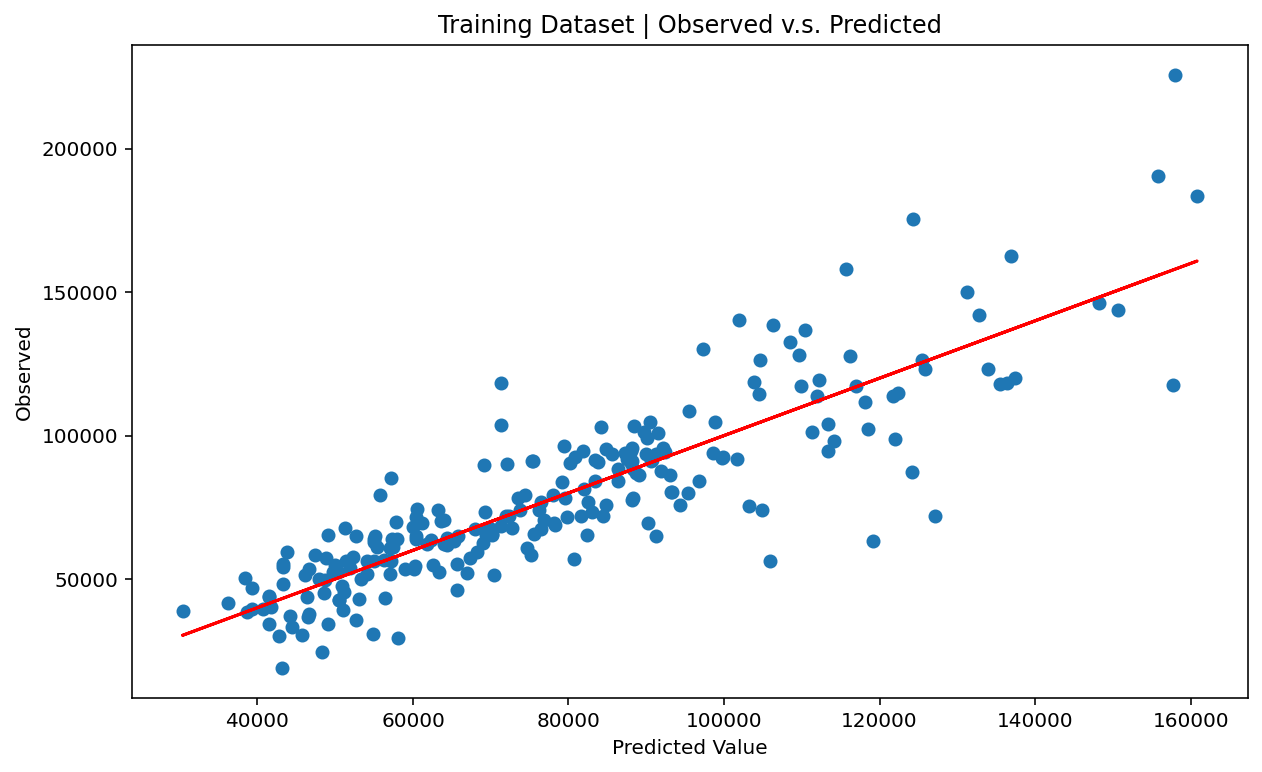

In [60]:
#create a function that creates the scatter plot needed to determine linearity where x = predicted values and y = observed values
#function takes in a dataFrame and makes copies of certain columns


def linearityAssumption(training_results):

    #make copies of the columns
    train_predicted = training_results['Prediction'].copy()
    y_train_values = training_results['Tax Assessed Property Value'].copy()
    train_residuals = training_results['Residual'].copy()
    
    #create the scatter plot where y = observed values and x = predicted values 
    #this will help to determine if there is a linear relationship between x variables and y variable
    
    plt.title('Training Dataset | Observed v.s. Predicted')
    plt.xlabel('Predicted Value')
    plt.ylabel('Observed')
    
    # x,y
    plt.scatter(train_predicted, y_train_values)
    
    #assign variables to the coefficient and constant values from regression
    m, b = np.polyfit(train_predicted, y_train_values, 1)

    #use red as color for regression line and plot
    plt.plot(train_predicted, m*train_predicted+b, color='red')

    plt.show()

linearity = linearityAssumption(training_results)

linearity

#### Linearity Assumption:

The Observed v.s. Predicted scatter plot showed that the x variables and y variable follow a linear relationship. There are no curvatures that could signal quadratic, polynomials/rational, or exponential/logarithmic, non-linear functions.

### 6.2.2 Homoscedasticity

It is important to determine if homoscedasticity exists because if it doesn't, the coefficient values of the multi-linear regression model could be less precise given that heteroscedasticity increases the variance of the coefficient estimates. This could lead one to state that a term is stastically significant, when in reality, it is not. 

Moreover, a Residual itself is a measure of variance and since the Predicted Values are derived from the x variables, one could use a scatter plot where x =  Predicted Value and y =  Standardized Residual. This would give a better understanding if homoscedasticity exists among the residuals. Ideally, the data should not show a pattern of any sort and the values of the Standardized Residual should not increase as the Predicted Value increases. 

In addition to visual tests, the statistical Breush-Pagan Test should be used to determine if there is equal variance among the residuals. It's null hypothesis is as follows:

- H0: Residual Variances are equal.
- H1: Residual Variances are NOT equal.

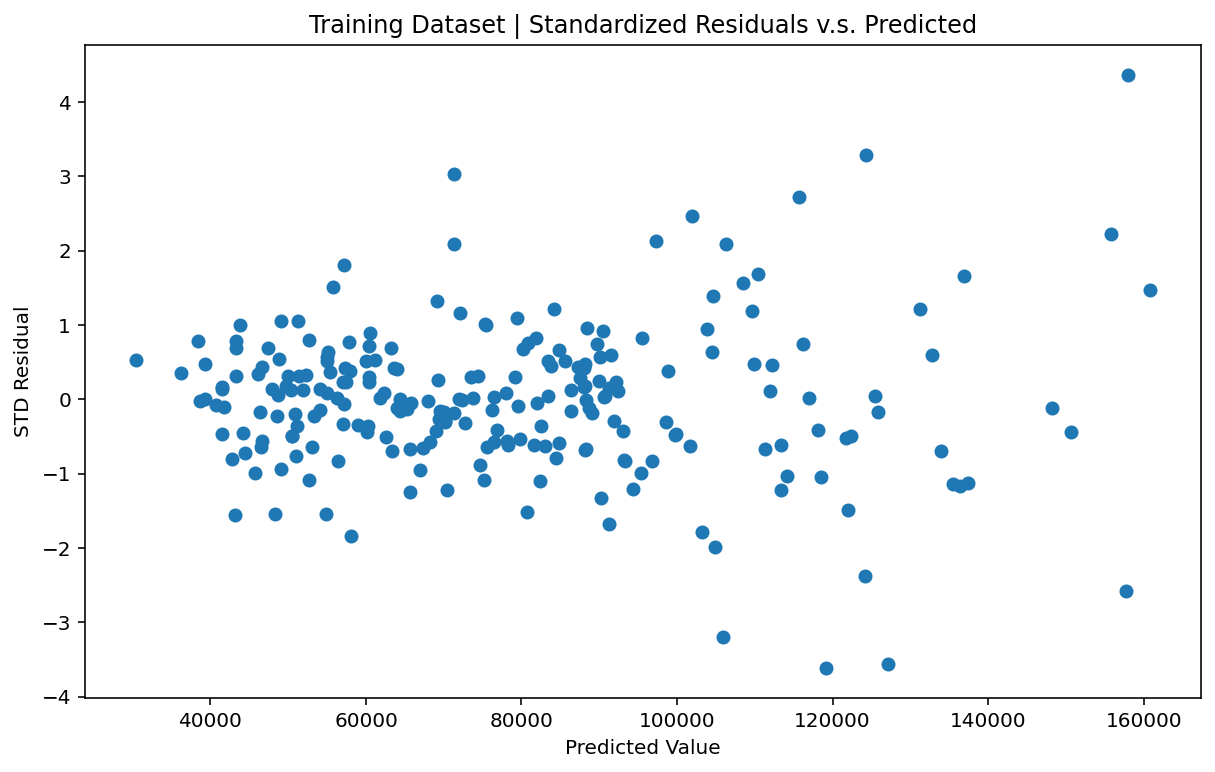

Bresuch-Pagan Test:

P-Value =  3.8529e-06


In [61]:
#create a function that creates the scatter plot used to determine homoscedasticity
#input a dataframe

def homoscedasticity_scatter(training_results):
    
    #the residuals have to be standardized because the std might be bigger or larger depending on the value of the property
    training_results[['Residual']] = StandardScaler().fit_transform(training_results[['Residual']])

    # training_results[['Prediction']] = StandardScaler().fit_transform(training_results[['Prediction']])

    #make copies
    train_predicted = training_results['Prediction'].copy()
    train_residuals = training_results['Residual'].copy()

    #plot the scatter graph

    plt.title('Training Dataset | Standardized Residuals v.s. Predicted')
    plt.xlabel('Predicted Value')
    plt.ylabel('STD Residual')

    plt.scatter(train_predicted, train_residuals)


    plt.show()
    
    
    

#create a function to perform the stastical test used to determine equal variance of residuals    
def bresuch_pagan(lin_reg_train):
#perform Bresuch-Pagan Test

    from statsmodels.compat import lzip
    import statsmodels.stats.api as sms

    #perform Bresuch-Pagan test
    test = sms.het_breuschpagan(lin_reg_train.resid, lin_reg_train.model.exog)
    p_value = round(test[1],10)
    print('Bresuch-Pagan Test:\n')
    print('P-Value = ',p_value)
    
    

#run the functions    
homoscedasticity = homoscedasticity_scatter(training_results)
bresuch_pagan(lin_reg_train)

#### Homoscedasticity Assumption (1):

The Residuals v.s. Predicted scatter plot showed that there was a random pattern, meaning that a non-linear relationship does not exist. However, the Standardized Residual Values increased while the Predicted Values increased; from a visual point of view, that signaled that the variance is not equal among the residuals.

In addition, from a statistical point of view, the Bresuch-Pagan Test returned a P-Value of less than 0.05, thus the null-hypothesis was rejected and the alternative hypothesis ( H1: Residual Variances are NOT equal) was accepted. Unfortunately, this was a violation of the homoscedastic assumption. To fix this violation, the dependent variable was transformed in log terms, in other words, instead of predicting the Tax Assessed Value, the model would predict the log of the number of Tax Assessed Value.

In [62]:
#print dataframe to see what you are changing; should see numbers in the thousands
y_train.head()


,taxAssessment
2,190300.0
3,118300.0
4,113700.0
7,114800.0
9,70500.0


In [63]:
#apply the natural log transformation 
y_train = y_train.apply(np.log)
y_train.head()

,taxAssessment
2,12.156357
3,11.680979
4,11.641319
7,11.650947
9,11.163368


In [64]:
#run the model again but with the transformed dependent variable y
#notice how the variable is called reg_train instead of lin_reg_train


reg_train = sm.OLS(y_train, X_train).fit() 
print(reg_train.summary())

                            OLS Regression Results                            
Dep. Variable:          taxAssessment   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     29.59
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           8.39e-52
Time:                        10:53:21   Log-Likelihood:                 45.372
No. Observations:                 236   AIC:                            -46.74
Df Residuals:                     214   BIC:                             29.46
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5763      0

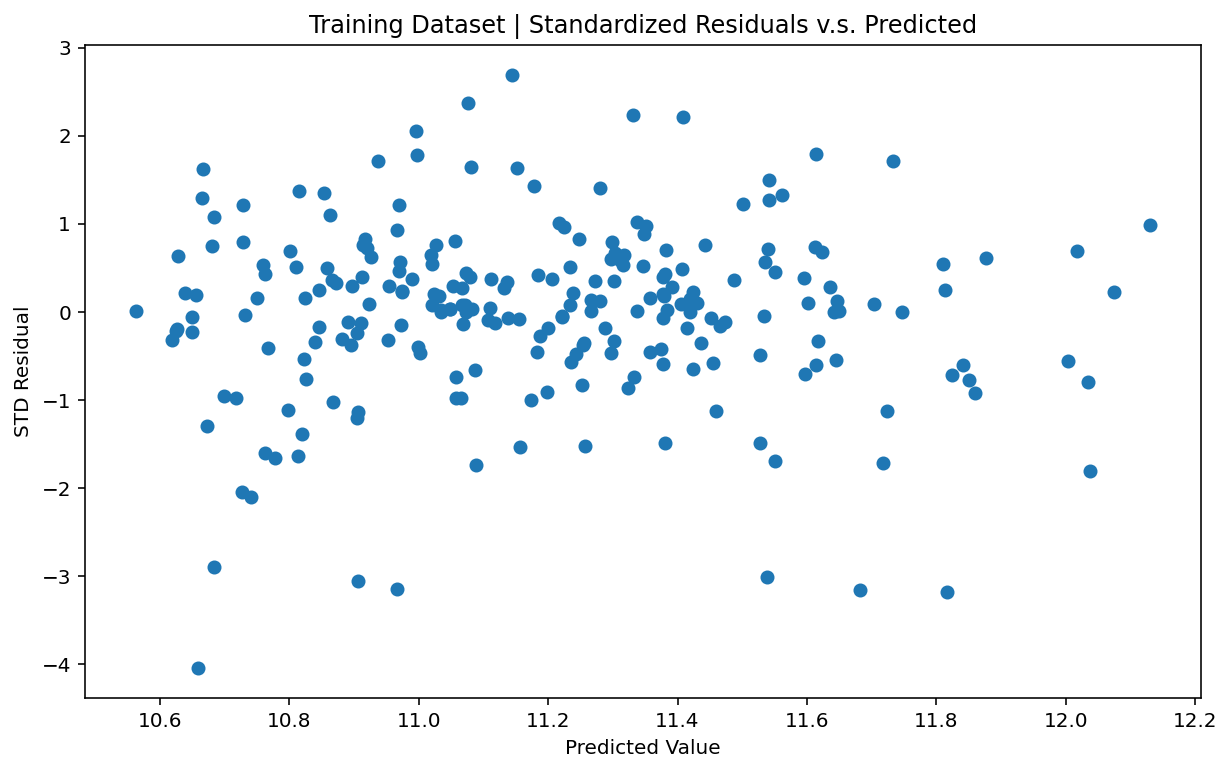

Bresuch-Pagan Test:

P-Value =  0.0542621298


In [65]:
#call the dataframe creation function and feed it into the homoscedasticity function
new_regression = performanceTable(reg_train,X_train,y_train)

homoscedasticity = homoscedasticity_scatter(new_regression)

bresuch_pagan(reg_train)

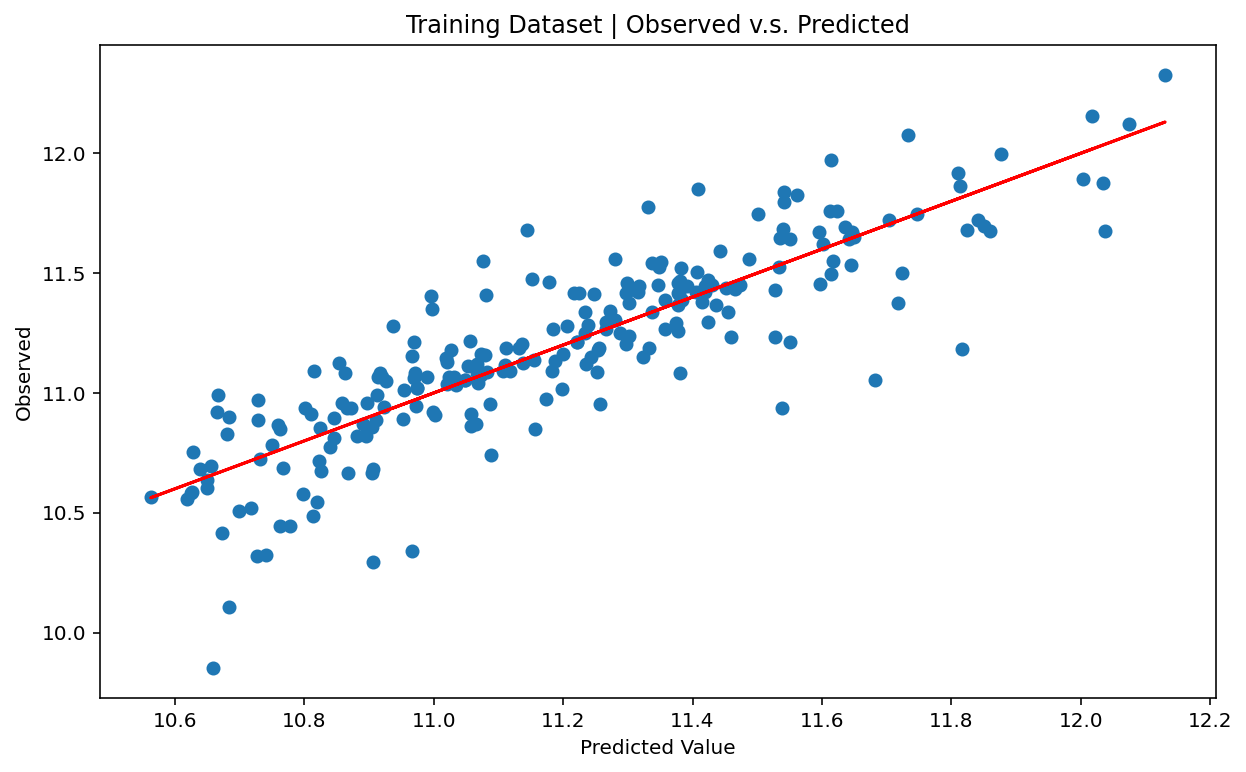

In [66]:
#call linearity function to see if anything has changed
new_regression = performanceTable(reg_train,X_train,y_train)

linearity = linearityAssumption(new_regression)

#### Homoscedasticity/Linearity Assumption (2):

The Residuals v.s. Predicted scatter plot showed that the residual variance are of relative equal value. In addition, after running the Bresuch Pagan test, a P-Value of 0.054 was calculated. This was greater than the 0.05 threshold, thus we failed to reject the null-hypothesis. In other words, the Residual Variances are equal in the dataset, and the assumption of Homoscedasticity has been satisfied. 

Moreover, given that a new regression was performed, it was important to test the linearity assumption again because the log transformation could have altered the relationship between the independent variables. However, that was not the case here; the plot showed that linearity still exists. 

### 6.2.3 Multicollinearity

As noted by the output summary, the smallest eigenvalue is 5.63e-31 which indicated that there were strong multicollinearity problems. The independent variables of the regression must be independent, meaning they should not be related to one another. If the variables are correlated, the regression model has a difficult time finding the independent relationship between the x variables the dependent variable y. This leads to a high standard error value, thus making the coefficient value unreliable. In addition, the p-values of the independent variables become hard to trust. 

One way to detect multicollinearity is to perform a regression on each non-zero, independent x variable. The regression will provide a formula and an R-Squared value. A high R-Squared value implies that the variable is correlated to other variables in the regression. Consider the following example:  


- Original Regression: y = b + x1 + x2 + x3 + ... +xn
- Multicollinearity Resolution: 

    - x1 = b + x2 + x3 + ... + xn; R-Squared = 0.75
    - x2 = b + x1 + x3 + ... + xn; R-Squared = 0.25
    - x3 = b + x2 + x3 + ... + xn; R-Squared = 0.20

In the example, the x1 variable had the highest R-Squared value, but instead of comparing R-Squared values, the Variance Inflation Factor (VIF) is used to measure the impact of collinearity among the variables in a regression model. VIF uses the R-Sqauared value in the following way:

- VIF_i = 1 / (1 - R-Squared_i); where i pertains to the independent variable
    - The higher the R-Squared_i value, the smaller the denominator
    - The smaller the denominator, the higher the VIF_i value


A VIF value of 1 indicates two variables are not correlated, a VIF between 1 and 5 indicates moderate correlation, and a VIF above 5 indicates high correlation. It is important to note that 'dummy' variables have 0 or 1 values which cause the VIF calculation to break since one cannot divide by 0, thus these variables will be excluded from the VIF analysis.

In [67]:
X_train.head()

,const,Size_SqFt,bathrooms,bedrooms,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,...,19124,19131,19134,19135,19138,19139,19140,19142,19143,19145
2,1.0,1.523233,3.134407,0.050097,0.86,7.89,71.75,-1.105274,0.182112,2.027856,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.305173,-0.246719,1.211167,0.86,7.89,71.75,-0.963494,-0.346392,1.644383,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.401437,1.443844,0.050097,0.86,7.89,71.75,-1.190935,-0.393024,0.914837,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0.243949,-0.246719,0.050097,0.29,8.34,65.75,-1.164195,-0.222038,1.368256,...,0,1,0,0,0,0,0,0,0,0
9,1.0,-0.633136,-0.246719,0.050097,0.84,7.28,76.50,-1.018258,-0.672820,0.080361,...,0,0,0,0,0,0,0,1,0,0


In [68]:
#create the VIF dataframe and remove the variables that are binary aka dummy
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Variable"] = X_train.columns


#create a new column to that helps the user check how correlated the variable is

vif['Correlation Type'] = ['No Correlation' if VIF_Factor == 1.0 else('Moderate Correlation' if VIF_Factor > 1 and VIF_Factor <5 else 'High Correlation') for VIF_Factor in vif['VIF_Factor']]

vif


C:\Users\Papi\Documents\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Papi\Documents\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,Variable,Correlation Type
0,0.000000,const,High Correlation
1,1.805486,Size_SqFt,Moderate Correlation
2,2.282486,bathrooms,Moderate Correlation
3,1.776584,bedrooms,Moderate Correlation
4,inf,Crime_Rate_V,High Correlation
5,inf,School_Score,High Correlation
6,inf,Walk_Transit_Score,High Correlation
7,1.584871,Sheriff Cost,Moderate Correlation
8,1.283142,Opening Bid,Moderate Correlation
9,2.959013,Zillow Estimate,Moderate Correlation


In [69]:
#filter out the 'dummy' variables and the constant
#then analyze which ones have a high VIF

non_dummy_VIF =  vif.query('VIF_Factor != "inf" and VIF_Factor != 0') 
non_dummy_VIF

,VIF_Factor,Variable,Correlation Type
1,1.805486,Size_SqFt,Moderate Correlation
2,2.282486,bathrooms,Moderate Correlation
3,1.776584,bedrooms,Moderate Correlation
7,1.584871,Sheriff Cost,Moderate Correlation
8,1.283142,Opening Bid,Moderate Correlation
9,2.959013,Zillow Estimate,Moderate Correlation
10,1.081891,Property_Age,Moderate Correlation
11,1.746726,Condominium,Moderate Correlation
12,1.473433,MultiFamily2To4,Moderate Correlation
13,1.659162,Townhouse,Moderate Correlation


#### Multicollinearity Assumption (1):

After analyzing the VIF table, it was determined that the non-'dummy' variables of the regression model had a Moderate Correlation. This Correltion Type was not high enough to justify the multicollinearity issues that occured in the model. What could be causing this multicollinearity issue are the following variables:

- School
- Crime
- Walking

The reason being is because these scores are given to area codes, not each individual property. This means that if one knows the postal code, then one could figure out its three respective scores, thus making them interelated. 

In [70]:
#run once and drop the variables
#remove the score variables from the dataset and run the model again 
X_train = X_train.drop('Crime_Rate_V',1)
X_train = X_train.drop('School_Score',1)
X_train = X_train.drop('Walk_Transit_Score',1)

In [71]:
#see how it looks after the removal
X_train.head()

,const,Size_SqFt,bathrooms,bedrooms,Sheriff Cost,Opening Bid,Zillow Estimate,Property_Age,Condominium,MultiFamily2To4,...,19124,19131,19134,19135,19138,19139,19140,19142,19143,19145
2,1.0,1.523233,3.134407,0.050097,-1.105274,0.182112,2.027856,-0.405895,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.305173,-0.246719,1.211167,-0.963494,-0.346392,1.644383,-0.086574,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.401437,1.443844,0.050097,-1.190935,-0.393024,0.914837,-0.161886,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0.243949,-0.246719,0.050097,-1.164195,-0.222038,1.368256,-0.161886,0,0,...,0,1,0,0,0,0,0,0,0,0
9,1.0,-0.633136,-0.246719,0.050097,-1.018258,-0.672820,0.080361,-0.161886,1,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
#run the regression again to see if the multi-collinearity issue went away
reg_train = sm.OLS(y_train, X_train).fit() 

print(reg_train.summary())

                            OLS Regression Results                            
Dep. Variable:          taxAssessment   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     29.59
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           8.39e-52
Time:                        10:53:43   Log-Likelihood:                 45.372
No. Observations:                 236   AIC:                            -46.74
Df Residuals:                     214   BIC:                             29.46
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3355      0.045    2

#### Multicollinearity Assumption (2):

After the 'dummy' variables were removed from the dataset, the multicollinearity issues went away, and the Independence assumption was satisfied.


### 6.2.4. Normality

The last assumption that neeeds to be satisfied is the one of normality. The residuals produced from the regression model must follow a normal distribution. To determine this, there are several metrics that can be used. First and foremost, one could create a histogram of the standardized residuals to visually see if the data is normally distributed. Moreover, the skewness metric can be used to determine normality. If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. 

Additionally, a Q-Q Plot can be used to see if the data is normally distributed. The plot consists of plotting two sets of quantiles together where x = Normal Quantiles and y = Observed Quantiles. Ideally, if both sets of quantiles came from the same, normal distribution, the points should form relatively straight line. 


Finally, the statistical test, Jarque-Bera (JB), can be conducted where:

- H0 : Data is normal
- H1 : Data is NOT normal


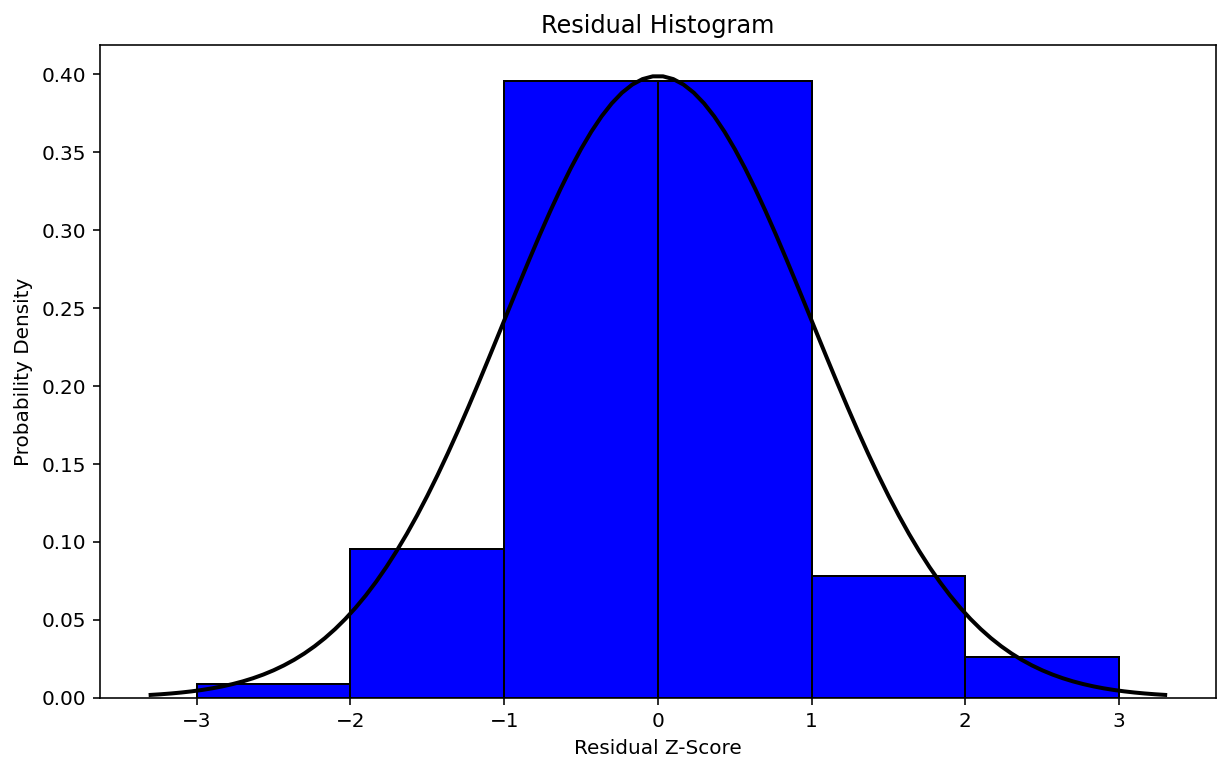

In [73]:
#create a histogram function

def normalityAssumption(training_results):
    
    #standardize the residual values,converting them to z-scores that will be used for the x- axis
    training_results[['Residual']] = StandardScaler().fit_transform(training_results[['Residual']])
       
    
    #make copies of the columns
    train_residuals = training_results['Residual'].copy()

    
    
        
    #create a normally distributed curve 
    import numpy as np
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    
    
    #fit the normal distributed curve onto the data that you create the histogram with 
    mu, std = norm.fit(train_residuals) 

    # Plot the histogram
    plt.hist(train_residuals, bins=[-3,-2,-1,0,1,2,3], density=True, color='b', edgecolor='black')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'k', linewidth=2)
    
    #label histogram
    plt.title('Residual Histogram')
    plt.xlabel('Residual Z-Score')
    plt.ylabel('Probability Density')
    
    
    plt.show()

    
    
    
normalityAssumption(training_results)

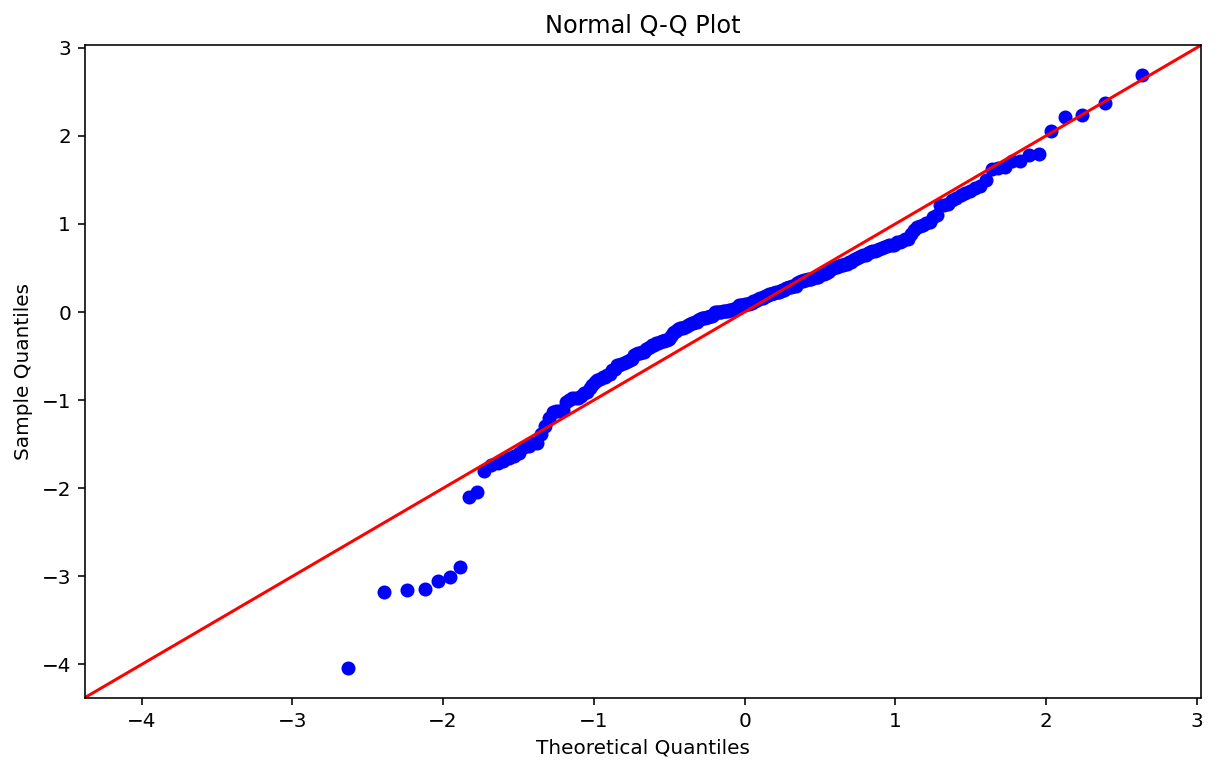

In [74]:
#create qq plot to see if the values are normally distributed

res = reg_train.resid # residuals
fig = sm.qqplot(res,fit=True, line="45")
plt.title('Normal Q-Q Plot')
plt.show()


#### Normality Assumption:
The Q-Q Plot has a fat, left tail that, which aligned with the relatively high Kurtosis value of 5.115 that was shown in the summary. A kurtosis of higher than 3 indicates that the data has heavier tails than a normal distribution (more data in the tails). Datasets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. However, the data on the QQ Plot seemed to be relatively straight after the tail ends around the -2 Theoretical Quantile. 

Moreover, the skew metric from the summary output was -0.794, indicating a moderately skewed dataset. However, to be statistically correct about the normality of the dataset, the Jarque-Bera test from the summary output can be used to determine if the data is normal. It uses the following two (statistical) properties of the normal
distribution:

- The Normal distribution is symmetric around its mean (skewness = zero)

- The Normal distribution has kurtosis three, or Excess kurtosis = zero


In this case, the JB is 1.17e-15, relatively close to 0. This means that we fail to reject the null-hypothesis, thus determining that the residuals are normally distributed and the regression assumption of normality was met.

### 6.2.5. No Autocorrelation

In a multi-linear regression model, the assumption is that residuals are independent and are not influenced by the errors of other observations. Autocorrelation is common in time-series analysis given that a prior time period could impact the following time period. When there are financial scandals involving a public company, it is common to see the stock price fall on the day of the news release. It is also common to see the stock price fall again the following days as the market digests the news.   

Having Autocorrelation in the model means that the standard errors are under estimated, which causes a mis-leading P-Value. To detect Autocorrelation, the Durbin-Watson metric was used, and its rule of thumb is that test statistic values in the range of 1.5 to 2.5 are relatively normal. This model had a value of 1.868, per the summary output. Overall, this model is sound and can move forward with predicting the log of the Tax Assessed Property values.

### 6.3. Model Interpretation

After verifying all the assumptions of the multi-linear regression model, it was safe to intepret the following information:

- Metrics related to the output of the regression:

    - Adjusted R-Squared
    - Coefficient Values
    - P-Values
    - F-Statistics

- Transformation of the Y variable:
    - How does the log of the Y variable impact the analysis?

### 6.3.1 Regression Metrics

The regression model had an Adjusted R-squared of 0.719, which is relatively high. This can be interpreted as follows: 72% of the variance in the target variable can be explained by the independent variables. It measures the strength of the relationship between the model and the dependent variable on a 0 – 100% scale. 


In addition, understanding what variables might be significant in predicting the log of Tax Assessed Property Values can be determined via the P-Value of each variable. The P-Value is the probability of getting a value as "extreme" as the coefficient value (B_n), assuming that the the null hypothesis (B_n = 0) is true. Consider the following variable ("Opening Bid") from the regression output:

- Coefficient Value = -0.0017
- P-Value = 0.924

The values should be interpreted as follows: If the experiment was repeated 100 times, there is a 92.4% chance that the null hypothesis is true. In other words, this coefficient value is not statistically significant; generally only a P-Value less than 0.05 is said to be statistically signifcant, and the following variables matched that criteria:

- Zillow Estimate 
- Whether the property is located in the following Postal Codes of Philadelphia:


    - 19120
    - 19134
    - 19140
    - 19143

In addition to the individual variables, the F-Statistic has the null hypothesis that all of the regression coefficients are equal to zero. This model's F-Statistic probability was 8.39e-52, which indicated that we can reject the null hypothesis and conclude that regression coefficients are, in fact, non-zero.

Although, this regression output was analyzed, a new regression had to be created involving only the statistically significant variables. Ideally, this new regression will yield a higher adjusted r-squared value. 

In [75]:
#select the variables that are statistically significant
significant_variables = X_train[["Size_SqFt","Zillow Estimate",19120,19134,19140,19143]]
#print dataframe
significant_variables.head()

,Size_SqFt,Zillow Estimate,19120,19134,19140,19143
2,1.523233,2.027856,0,0,0,0
3,1.305173,1.644383,0,0,0,0
4,0.401437,0.914837,0,0,0,0
7,0.243949,1.368256,0,0,0,0
9,-0.633136,0.080361,0,0,0,0


In [76]:
# define the independent variables and make sure to add the intercept (constant) 
significant_variables = sm.add_constant(significant_variables)


#run the regression again to see if the Adujsuted R-Squared increases
sig_reg_train = sm.OLS(y_train, significant_variables).fit() 

print(sig_reg_train.summary())

                            OLS Regression Results                            
Dep. Variable:          taxAssessment   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     90.15
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           1.69e-57
Time:                        10:53:53   Log-Likelihood:                 27.741
No. Observations:                 236   AIC:                            -41.48
Df Residuals:                     229   BIC:                            -17.24
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.2585      0.018    6

After running the regression model with only the statistically significant variables, the Adjusted R-Squared of 0.69 is slightly lower than the Adjusted R-Squared of 0.719 associated with the previous regression, thus the previous regression model will be used. 

### 6.3.2 Log-Level Regression Interpretation

This type of regression refers to the situation where the dependent variable is the only variable that was transformed using the natural log. The other independent variables remain in their orginal form. To properly analyze the impact that the coefficient has on the untransformed dependent variable, the coefficient value needs to be reversed. 


<ins> Zillow Estimate Inputs from Regression Summary<ins>:
 
 - Coefficient value in terms of natural log = 0.2993
 - Y = the log-transformed value of Tax Assessed Property Value
 - X = 1

<ins>Procedures<ins>:

1. ln Y = Coefficient value in terms of natural log * 1 unit of X variable

    - ln Y = 0.2993 * 1
    
    
    

2. To get the untransformed y value, apply the natural exponent on each side of the equation 

    - exp(ln Y) = exp(0.2993)
    
    

3. This isolates the Y variable on the left

    - Y = exp(0.2993) = 1.3489

    - The Y value is the ratio of which the untransformed dependent variable increases/decreases for every one unit increase in the X variable
    
    
4. Subtract this value by 1 and then multiply by 100 to get the percentage increase/decrease of the untransformed dependent variable for every one unit increase in the x variable. Percentage Impact = (Y - 1) * 100 
    
    - Percentage Impact = (1.3489 - 1) = 0.3489 * 100 = 34.89%
    
    
    - 19120
    - 19134
    - 19140
    - 19143

    
    
    
log(y)=β0+β1x
 

exp(log(y))=exp(β0+β1x)
 

y=exp(β0+β1x)
    
    
<ins>Interpretation of Statistically Significant Coefficients<ins>: 



Stat Lingo: Recall that 'dummy' variables were used in the model and the concept of (n-1) was applied to this analysis. For every one unit increase in the Zillow Estimate variable, the untransformed Y variable is set to increase by 34.89 percent.

English: If you increase the Zillow Estimate variable by one unit, the predicted Tax Assessed Property will be 34.89 larger than that of a Single Family property type that is located in the 19144 postal area code. 

Interpret the following sentences with the same logic:    
    
   - For every one unit increase in the 19120 variable, the untransformed Y variable is set to increase by 13.10 percent
   - For every one unit increase in the 19134 variable, the untransformed Y variable is set to decrease by 34.02 percent
   - For every one unit increase in the 19140 variable, the untransformed Y variable is set to decrease by 20.01 percent
   - For every one unit increase in the 19143 variable, the untransformed Y variable is set to decrease by 25.37 percent


## 7. Tax Assessed Value Prediction

This section uses the multi-linear regression model to make predictions of the log of tax assessed property value, on the test datasets. However, the first step was to prepare the test dataset; drop a few, irrelevant columns in the x variable and transform the dependent values from their original form to their natural log form since that's what the model is predicting.  

In [77]:
#shape
print(X_test.shape)

#display data
X_test.head()

(158, 25)


,const,Size_SqFt,bathrooms,bedrooms,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,...,19124,19131,19134,19135,19138,19139,19140,19142,19143,19145
313,1.0,0.500775,-0.246719,0.050097,0.80,5.07,79.00,-1.759373,-0.268670,-0.492008,...,0,0,0,0,0,0,0,0,1,0
315,1.0,-1.001415,-0.246719,0.050097,0.97,11.05,71.25,-0.053236,0.026670,-0.549567,...,0,0,1,0,0,0,0,0,0,0
316,1.0,-0.516837,-0.246719,0.050097,0.28,8.28,70.50,-0.171090,-0.408568,-0.549654,...,0,0,0,0,1,0,0,0,0,0
318,1.0,0.374785,1.443844,1.211167,0.28,8.28,70.50,0.430260,0.959323,0.226588,...,0,0,0,0,1,0,0,0,0,0
321,1.0,0.016198,-0.246719,0.050097,1.54,3.34,80.08,0.003613,-0.610643,-0.455740,...,0,0,0,0,0,1,0,0,0,0


In [78]:
#prepare the test data that needs to be inputted into the model
#run once and drop the variables
#remove the score variables from the dataset and run the model again 
X_test = X_test.drop('Crime_Rate_V',1)
X_test = X_test.drop('School_Score',1)
X_test = X_test.drop('Walk_Transit_Score',1)

In [79]:
#shape
print(X_test.shape)

#display data
X_test.head()

(158, 22)


,const,Size_SqFt,bathrooms,bedrooms,Sheriff Cost,Opening Bid,Zillow Estimate,Property_Age,Condominium,MultiFamily2To4,...,19124,19131,19134,19135,19138,19139,19140,19142,19143,19145
313,1.0,0.500775,-0.246719,0.050097,-1.759373,-0.268670,-0.492008,-0.161886,1,0,...,0,0,0,0,0,0,0,0,1,0
315,1.0,-1.001415,-0.246719,0.050097,-0.053236,0.026670,-0.549567,-0.146823,0,0,...,0,0,1,0,0,0,0,0,0,0
316,1.0,-0.516837,-0.246719,0.050097,-0.171090,-0.408568,-0.549654,-0.161886,0,0,...,0,0,0,0,1,0,0,0,0,0
318,1.0,0.374785,1.443844,1.211167,0.430260,0.959323,0.226588,-0.161886,1,0,...,0,0,0,0,1,0,0,0,0,0
321,1.0,0.016198,-0.246719,0.050097,0.003613,-0.610643,-0.455740,-0.297446,1,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
#check to see how the y_test variable is like; should be the actual data from the orginial dataset
y_test.head()

,taxAssessment
313,69800.0
315,58400.0
316,67700.0
318,116100.0
321,65800.0


In [81]:
#run once
#apply the natural log transformation so that the performance table can be created
y_test = y_test.apply(np.log)
y_test.head()

,taxAssessment
313,11.153389
315,10.975071
316,11.122841
318,11.662207
321,11.094375


In [84]:
#call the performance table function
#reg_train is the variable that holds the model
test_results = performanceTable(reg_train,X_test,y_test)


test_results.head()

,Prediction,Tax Assessed Property Value,Residual
0,10.841183,11.153389,0.312206
1,10.847795,10.975071,0.127276
2,11.123526,11.122841,-0.000685
3,11.417874,11.662207,0.244333
4,10.979515,11.094375,0.114860


### 7.1 Predictive Model Evaluation (Test Data)

To evaluate the model's performance, Mean Squared Prediction Error (MSPE) and the Mean Absolute Percentage Error (MAPE) can be used. Ideally both numbers should be relatively small because the smaller the value, the more accurate the model is. What the MSPE tells us the aveage squared distance between the model's prediction and the true value. MAPE should be interpreted as the average percentage the model is off by. If MAPE = 15, then on average, the model's prediction is off by + or  - 15%. A MAPE of less than 10% is ideal and a MAPE of less than 20% is considered relatively average/good.

In [85]:

#create the Residual Squared column
test_results['Error_Squared'] = round(test_results['Residual']**2,5)

#create the Absolute Percentage Error column
test_results['Absolute_Percentage_Error'] = abs(round((test_results['Residual']/test_results['Prediction'])*100,2))

#results page
print('Mean Squared Predicted Error & Mean Absolute Percentage Error:\n')
print('MSPE Value:',round(test_results.Error_Squared.mean(),5))
print('MAPE Value:',round(test_results.Absolute_Percentage_Error.mean(),2))

test_results.head()

Mean Squared Predicted Error & Mean Absolute Percentage Error:

MSPE Value: 0.05266
MAPE Value: 1.61


,Prediction,Tax Assessed Property Value,Residual,Error_Squared,Absolute_Percentage_Error
0,10.841183,11.153389,0.312206,0.09747,2.88
1,10.847795,10.975071,0.127276,0.01620,1.17
2,11.123526,11.122841,-0.000685,0.00000,0.01
3,11.417874,11.662207,0.244333,0.05970,2.14
4,10.979515,11.094375,0.114860,0.01319,1.05


Both MSPE and MAPE are low, which indicates the model is accurate, perhaps too accurate. Remember that the point of interest is not to see how well the x variables predict the log of the y variable. The point of interest is too see how well the x variables predict the value of the y variable, of which is expressed in dollars. 

### 7.2  Model Evalutaion (Risk Tolerance Method) 

There is an important distinction between the results of the multi-linear regression model, and its ability to predict the Tax Asessed Value accurately. To properly determine the model accuracy, the real-estate investor has to establish a risk-tolerance based on percentage points. In this case, the model's accuracy was determined based on its ability to predict the tax assessed value within a plus or minus 10 percent variance. For example, if a Tax Assessed Value is 100,000 USD and the model predicted somewhere between 90,000 USD and 110,000 USD, the analysis will deem the instance to be accurate. It is important to note that the variance percentage is an arbitrary number that can be changed depending on an investor's risk tolerance.

The process is essentially the same as in the previous section, but this time around, the values are exponentiated using Euler's number. Doing this will transform the dependent variable into its original stage. 



In [86]:
#see how the dependent variable is currently expressed
y_test_values = y_test.copy()
y_test_values


,taxAssessment
313,11.153389
315,10.975071
316,11.122841
318,11.662207
321,11.094375
...,...
607,10.385914
608,10.288750
611,10.689670
613,11.092854


In [87]:
# #run once
# #exponenate the y_test values since they were transformed to meet the assumptions of the regression
y_test_values = y_test_values.apply(np.exp) 

In [88]:
#make sure the values have changed to their original form
y_test_values.head()

,taxAssessment
313,69800.0
315,58400.0
316,67700.0
318,116100.0
321,65800.0


In [89]:
#performance table
test_results = performanceTable(reg_train,X_test,y_test_values)
test_results.head()

,Prediction,Tax Assessed Property Value,Residual
0,10.841183,69800.0,69789.158817
1,10.847795,58400.0,58389.152205
2,11.123526,67700.0,67688.876474
3,11.417874,116100.0,116088.582126
4,10.979515,65800.0,65789.020485


In [90]:
#apply Euler's exponent on the values of the prediction column
test_results['Prediction'] = test_results['Prediction'].apply(np.exp)

In [91]:
#verify the transformation 
test_results.head()

,Prediction,Tax Assessed Property Value,Residual
0,51081.762110,69800.0,69789.158817
1,51420.647969,58400.0,58389.152205
2,67746.357924,67700.0,67688.876474
3,90932.637269,116100.0,116088.582126
4,58660.120387,65800.0,65789.020485


In [92]:
#the prediction was changed so now the residual has to be updated
test_results['Residual'] = test_results['Tax Assessed Property Value'] - test_results['Prediction']
test_results.head()

,Prediction,Tax Assessed Property Value,Residual
0,51081.762110,69800.0,18718.237890
1,51420.647969,58400.0,6979.352031
2,67746.357924,67700.0,-46.357924
3,90932.637269,116100.0,25167.362731
4,58660.120387,65800.0,7139.879613


In [99]:
#create %difference column
test_results['Absoltute_Percentage_Error'] = abs(round((test_results['Residual']/test_results['Tax Assessed Property Value'])*100,2))

# #take the mean of the plus or minus deviation
print('The MAPE for the training model is:',round(test_results['Absoltute_Percentage_Error'].mean(),2))

print()

# # add the accuracy column
test_results['Accuracy'] = test_results['Absoltute_Percentage_Error'].apply(lambda x: 'Accurate' if x <= 10  else 'Inaccurate')


# #calculate the accuracy of the predictions
testing_accuracy = round(test_results['Accuracy'].value_counts()[1]/(test_results['Accuracy'].value_counts()[0] +test_results['Accuracy'].value_counts()[1])*100,2)


print('Model Accuracy (%):',testing_accuracy)
test_results.head()


The MAPE for the training model is: 18.35

Model Accuracy (%): 31.65


,Prediction,Tax Assessed Property Value,Residual,Absoltute_Percentage_Error,Accuracy
0,51081.762110,69800.0,18718.237890,26.82,Inaccurate
1,51420.647969,58400.0,6979.352031,11.95,Inaccurate
2,67746.357924,67700.0,-46.357924,0.07,Accurate
3,90932.637269,116100.0,25167.362731,21.68,Inaccurate
4,58660.120387,65800.0,7139.879613,10.85,Inaccurate


The Mean Absolute Percentage Error (MAPE) is a metric used to determine the strength of a model's prediction accuracy. The MAPE of 18.35 can be interpreted in the following sentence: "On average, one could expect the model's prediction of Tax Assessed Property value to be off/wrong by 18.35% in either direction.

The model accuracy metric of 31.65% can be interpreted as follows: "The model predicted accurately on 31.65% of all the instances in the test dataset"



## 8. Conclusion

After creating a multi-linear regression model on real-estate data from properties in the Philadelphia region, it was apparent that certain variables exist that helped predict Tax Assessed Property values. The model was nearly 32% accurate on the test dataset and provided starting points for further analysis to begin. The model found that the Zillow Estimate and certain postal area codes such as 19120, 19134, 19140, 19143 were significant in predicting the target variable.

These findings could assist an investor if used concurrently with fundamental analysis. The recommendations, based on the model, is that investor should try to understand what differentiates the 19144 area code from area codes: 19134, 19140, 19143? The model predicted a lower value whenever a property was located in the those area codes. Similarly, the investor should understand what drives economic value in 19120 postal area code that could explain the price difference.

Finally, the shortcomings of this project was that the data was limited to sales of 2016 and only multi-linear regression was used. Going forward, more recent data should be used to reflect current market conditions and different analytical methods such as logistic regression and Navie Bayes Classifier, should be applied. Finally, what I learned during this project was the importance of creating a narative with Descriptive Analytics to better explain the Predictive Analytics component. Data Science is all about creating value and understanding how data analysis can help people make better business decisions.